## **Lead Score - Case Study**

### **Problem Statement** :
X Education sells online courses to industry professionals.The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not.The typical lead conversion rate at X education is around 30%. italicized text



### **Business Goal**
X Education needs help in selecting the most promising leads, i.e. the leads that are most likely to convert into paying customers.

The company needs a model wherein you a lead score is assigned to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80% *italicized text* italicized text

## Inspecting the dataframe

In [85]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
# Importing dataset
leads = pd.read_csv("Leads.csv",  sep = ',',encoding = "ISO-8859-1")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [87]:
print('*********************************  Info *******************************************\n') 
print(leads.info())
print('\n **************************** Describe *****************************')
print(leads.describe())

*********************************  Info *******************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                

In [88]:

# Check if there are any duplicate values in the dataset

leads[leads.duplicated(keep=False)]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [89]:
# Converting all the values to lower case
leads = leads.applymap(lambda s:s.lower() if type(s) == str else s)


In [90]:
# Replacing 'Select' with NaN (Since it means no option is selected)
leads = leads.replace('select',np.nan)


In [91]:
# Checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(leads.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leads.isnull().sum()/leads.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
How did you hear about X Education,7250,78.46
Lead Profile,6855,74.19
Lead Quality,4767,51.59
Asymmetrique Profile Score,4218,45.65
Asymmetrique Activity Score,4218,45.65
Asymmetrique Profile Index,4218,45.65
Asymmetrique Activity Index,4218,45.65
City,3669,39.71
Specialization,3380,36.58
Tags,3353,36.29


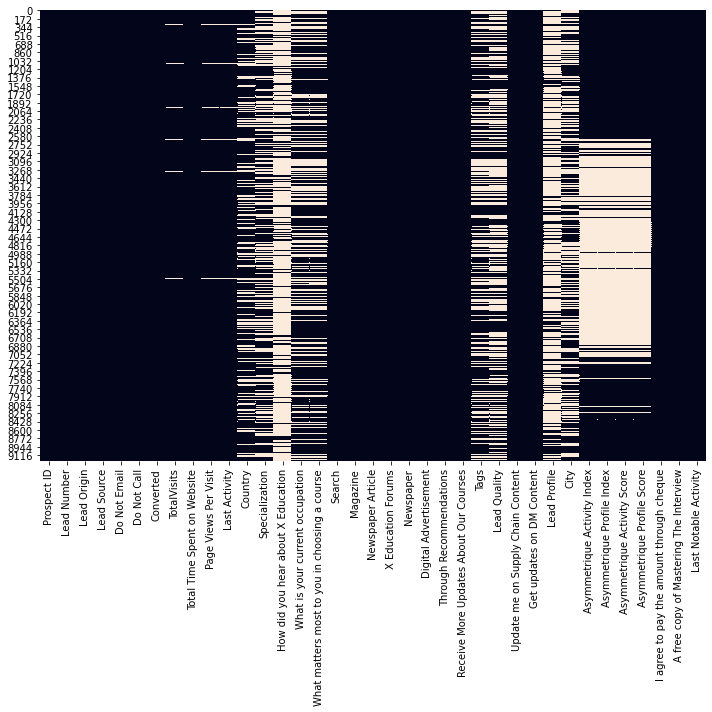

In [92]:
#Visualizing occurence of Null values in the columns based on rows¶

plt.figure(figsize=(10,10))
sns.heatmap(leads.isnull(), cbar=False)

plt.tight_layout()
plt.show()

In [93]:
# Identifying if any column exists with only null values
leads.isnull().all(axis=0).any()

False

In [94]:

# Checking if there are columns with one unique value since it won't affect our analysis
leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [95]:
#Remove columns which has only one unique value

"""
Deleting the following columns as they have only one unique value and hence cannot be responsible in predicting a successful lead case

Magazine
Receive More Updates About Our Courses
Update me on Supply Chain Content
Update me on Supply Chain Content
I agree to pay the amount through cheque

"""   
leads= leads.loc[:,leads.nunique()!=1]
leads.shape

(9240, 32)

In [96]:
# Deleting the columns 'Asymmetrique Activity Score' & 'Asymmetrique Profile Score' 
# as they will be represented by their corresponding index columns
leads = leads.drop('Asymmetrique Activity Score', axis=1)
leads = leads.drop('Asymmetrique Profile Score', axis=1)
leads.shape

(9240, 30)

In [97]:
# Deleting the columns 'Prospect ID' as it will not have any effect in the predicting model
leads = leads.drop('Prospect ID', axis=1)
leads.shape


(9240, 29)

In [98]:
# Deleting the columns 'What matters most to you in choosing a course' as it mostly has unique values and some null values.
leads = leads.drop('What matters most to you in choosing a course', axis=1)
leads.shape

(9240, 28)

In [99]:
#Removing rows where a particular column has high missing values
leads['Lead Source'].isnull().sum()

36

In [100]:
# removing rows as the column cannot be removed because of its importance
leads = leads[~pd.isnull(leads['Lead Source'])]
leads.shape

(9204, 28)

imputing data value with median value for continuous variables

In [101]:
leads.TotalVisits.describe()

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [102]:
leads.TotalVisits.value_counts()

0.0      2161
2.0      1679
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

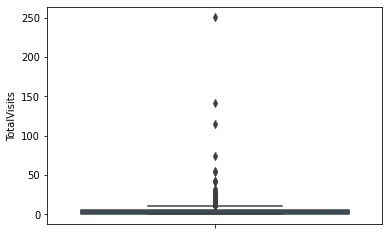

In [103]:
sns.boxplot(y = 'TotalVisits', data=leads)
plt.show()

In [104]:
leads['TotalVisits'].replace(np.NaN, leads['TotalVisits'].median(), inplace =True)
leads['TotalVisits'].isnull().sum()

0

In [105]:
leads['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [106]:
leads['Page Views Per Visit'].value_counts()

0.00    2161
2.00    1794
3.00    1196
4.00     896
1.00     651
        ... 
1.27       1
8.21       1
2.14       1
2.63       1
2.45       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [107]:
leads['Page Views Per Visit'].replace(np.NaN, leads['Page Views Per Visit'].median(), inplace =True)
leads['Page Views Per Visit'].isnull().sum()

0

 Imputing with Mode values

In [108]:
leads['Country'].mode()

0    india
dtype: object

In [109]:
leads.loc[pd.isnull(leads['Country']), ['Country']] = 'India'
leads['Country'].isnull().sum()

0

In [110]:
leads['Country'] = leads['Country'].apply(lambda x: 'India' if x=='India' else 'Outside India')
leads['Country'].value_counts()

Outside India    6778
India            2426
Name: Country, dtype: int64

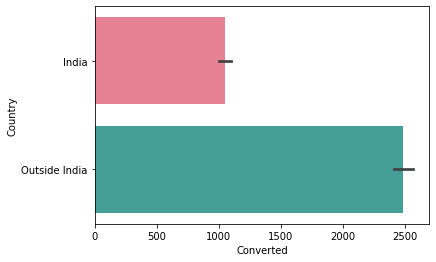

In [111]:
sns.barplot(y='Country', x='Converted', palette='husl', data=leads, estimator=np.sum)

In [112]:
# imputing values where columns have select value, as that column information is better

leads['Lead Quality'].value_counts()

might be             1545
not sure             1090
high in relevance     632
worst                 601
low in relevance      583
Name: Lead Quality, dtype: int64

In [113]:
leads['Lead Quality'].isnull().sum()

4753

In [114]:
leads['Lead Quality'].fillna("Unknown", inplace = True)
leads['Lead Quality'].value_counts()

Unknown              4753
might be             1545
not sure             1090
high in relevance     632
worst                 601
low in relevance      583
Name: Lead Quality, dtype: int64

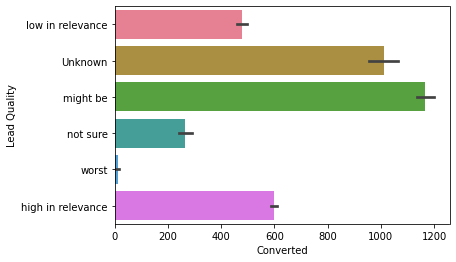

In [115]:
sns.barplot(y='Lead Quality', x='Converted', palette='husl', data=leads, estimator=np.sum)

In [116]:
# Creating a new category consisting on NULL/Select values for the field Asymmetrique Profile/score Index

In [117]:
leads['Asymmetrique Profile Index'].value_counts()

02.medium    2771
01.high      2201
03.low         31
Name: Asymmetrique Profile Index, dtype: int64

In [118]:
leads['Asymmetrique Profile Index'].isnull().sum()

4201

In [119]:
leads['Asymmetrique Profile Index'].value_counts()

02.medium    2771
01.high      2201
03.low         31
Name: Asymmetrique Profile Index, dtype: int64

In [120]:
leads['Asymmetrique Profile Index'].fillna("Unknown", inplace = True)
leads['Asymmetrique Profile Index'].value_counts()

Unknown      4201
02.medium    2771
01.high      2201
03.low         31
Name: Asymmetrique Profile Index, dtype: int64

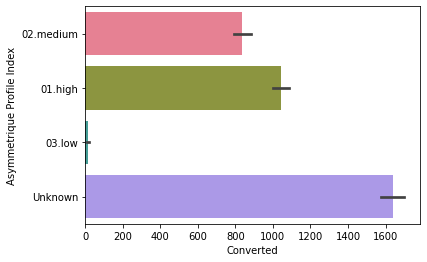

In [121]:
sns.barplot(y='Asymmetrique Profile Index', x='Converted', palette='husl', data=leads, estimator=np.sum)

In [122]:
leads['Asymmetrique Activity Index'].value_counts()

02.medium    3820
01.high       821
03.low        362
Name: Asymmetrique Activity Index, dtype: int64

In [123]:
leads['Asymmetrique Activity Index'].isnull().sum()

4201

In [124]:
leads['Asymmetrique Activity Index'].fillna("Unknown", inplace = True)
leads['Asymmetrique Activity Index'].value_counts()

Unknown      4201
02.medium    3820
01.high       821
03.low        362
Name: Asymmetrique Activity Index, dtype: int64

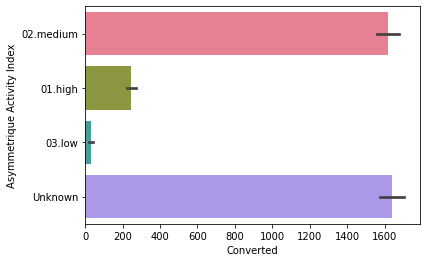

In [125]:
sns.barplot(y='Asymmetrique Activity Index', x='Converted', palette='husl', data=leads, estimator=np.sum)

In [126]:
# Creating a new category consisting on NULL/Select values for the field City
leads['City'].isnull().sum()

3638

In [127]:
leads['City'].fillna("Unknown", inplace = True)
leads['City'].value_counts()

Unknown                        3638
mumbai                         3220
thane & outskirts               751
other cities                    686
other cities of maharashtra     456
other metro cities              379
tier ii cities                   74
Name: City, dtype: int64

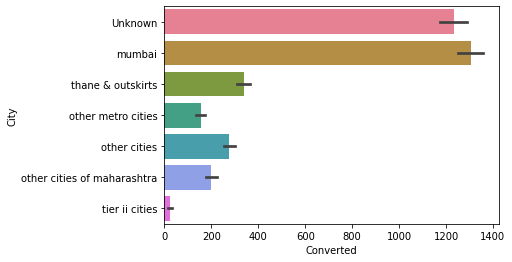

In [128]:
sns.barplot(y='City', x='Converted', palette='husl', data=leads, estimator=np.sum)

In [129]:
# Creating a new category consisting on NULL/Select values for the field Last Activity
leads['Last Activity'].value_counts()

email opened                    3432
sms sent                        2723
olark chat conversation          973
page visited on website          640
converted to lead                428
email bounced                    321
email link clicked               267
form submitted on website        116
unreachable                       93
unsubscribed                      59
had a phone conversation          30
approached upfront                 9
view in browser link clicked       6
email received                     2
email marked spam                  2
visited booth in tradeshow         1
resubscribed to emails             1
Name: Last Activity, dtype: int64

In [130]:
leads['Last Activity'].isnull().sum()

101

In [131]:
leads['Last Activity'].fillna("Unknown", inplace = True)
leads['Last Activity'].value_counts()

email opened                    3432
sms sent                        2723
olark chat conversation          973
page visited on website          640
converted to lead                428
email bounced                    321
email link clicked               267
form submitted on website        116
Unknown                          101
unreachable                       93
unsubscribed                      59
had a phone conversation          30
approached upfront                 9
view in browser link clicked       6
email received                     2
email marked spam                  2
resubscribed to emails             1
visited booth in tradeshow         1
Name: Last Activity, dtype: int64

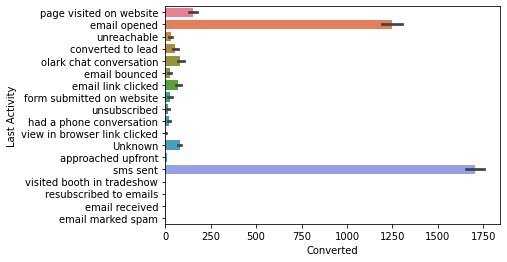

In [132]:
sns.barplot(y='Last Activity', x='Converted', palette='husl', data=leads, estimator=np.sum)

In [133]:
# Creating a new category consisting on NULL/Select values for the field Lead Profile
leads['Lead Profile'].value_counts()

potential lead                 1608
other leads                     487
student of someschool           241
lateral student                  24
dual specialization student      20
Name: Lead Profile, dtype: int64

In [134]:
leads['Lead Profile'].isnull().sum()

6824

In [135]:
leads['Lead Profile'].fillna("Unknown", inplace = True)
leads['Lead Profile'].value_counts()

Unknown                        6824
potential lead                 1608
other leads                     487
student of someschool           241
lateral student                  24
dual specialization student      20
Name: Lead Profile, dtype: int64

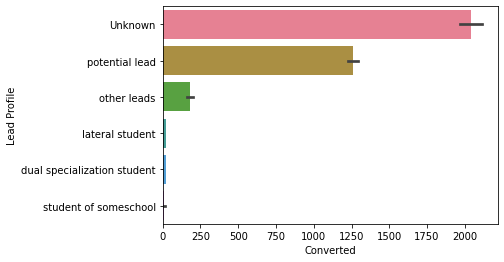

In [136]:
sns.barplot(y='Lead Profile', x='Converted', palette='husl', data=leads, estimator=np.sum)

In [137]:
# Creating a new category consisting on NULL/Select values for the field What is your current occupation
leads['What is your current occupation'].value_counts()

unemployed              5567
working professional     704
student                  209
other                     16
housewife                 10
businessman                8
Name: What is your current occupation, dtype: int64

In [138]:
leads['What is your current occupation'].isnull().sum()

2690

In [139]:
leads['What is your current occupation'].fillna("Unknown", inplace = True)
leads['What is your current occupation'].value_counts()

unemployed              5567
Unknown                 2690
working professional     704
student                  209
other                     16
housewife                 10
businessman                8
Name: What is your current occupation, dtype: int64

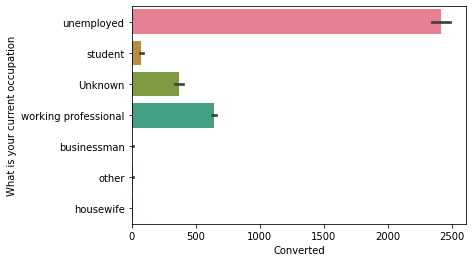

In [140]:
sns.barplot(y='What is your current occupation', x='Converted', palette='husl', data=leads, estimator=np.sum)

In [141]:
# Creating a new category consisting on NULL/Select values for the field Specialization
leads['Specialization'].value_counts()

finance management                   973
human resource management            847
marketing management                 837
operations management                502
business administration              403
it projects management               366
supply chain management              349
banking, investment and insurance    338
travel and tourism                   203
media and advertising                203
international business               178
healthcare management                158
hospitality management               114
e-commerce                           111
retail management                    100
rural and agribusiness                73
e-business                            57
services excellence                   40
Name: Specialization, dtype: int64

In [142]:
leads['Specialization'].isnull().sum()

3352

In [143]:
leads['Specialization'].fillna("Unknown", inplace = True)
leads['Specialization'].value_counts()

Unknown                              3352
finance management                    973
human resource management             847
marketing management                  837
operations management                 502
business administration               403
it projects management                366
supply chain management               349
banking, investment and insurance     338
travel and tourism                    203
media and advertising                 203
international business                178
healthcare management                 158
hospitality management                114
e-commerce                            111
retail management                     100
rural and agribusiness                 73
e-business                             57
services excellence                    40
Name: Specialization, dtype: int64

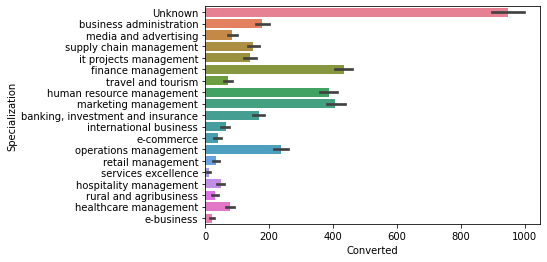

In [144]:
sns.barplot(y='Specialization', x='Converted', palette='husl', data=leads, estimator=np.sum)

In [145]:
# Creating a new category consisting on NULL/Select values for the field Tags
leads['Tags'].value_counts()

will revert after reading the email                  2052
ringing                                              1200
interested in other courses                           513
already a student                                     465
closed by horizzon                                    358
switched off                                          240
busy                                                  186
lost to eins                                          174
not doing further education                           145
interested  in full time mba                          117
graduation in progress                                111
invalid number                                         83
diploma holder (not eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    26
in touch with eins                                     12
lost to others

In [146]:
leads['Tags'].isnull().sum()

3342

In [147]:
leads['Tags'].fillna("Unknown", inplace = True)
leads['Tags'].value_counts()

Unknown                                              3342
will revert after reading the email                  2052
ringing                                              1200
interested in other courses                           513
already a student                                     465
closed by horizzon                                    358
switched off                                          240
busy                                                  186
lost to eins                                          174
not doing further education                           145
interested  in full time mba                          117
graduation in progress                                111
invalid number                                         83
diploma holder (not eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    26
in touch with 

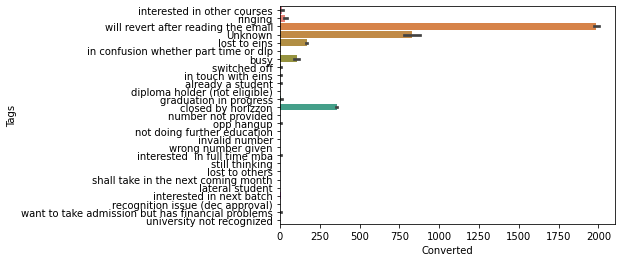

In [148]:
sns.barplot(y='Tags', x='Converted', palette='husl', data=leads, estimator=np.sum)

In [149]:
# Creating a new category consisting on NULL/Select values for the 'How did you hear about X Education'
leads['How did you hear about X Education'].value_counts()

online search            808
word of mouth            347
student of someschool    310
other                    186
multiple sources         152
advertisements            70
social media              66
email                     26
sms                       23
Name: How did you hear about X Education, dtype: int64

In [150]:
leads['How did you hear about X Education'].isnull().sum()

7216

In [151]:
leads['How did you hear about X Education'].fillna("Unknown", inplace = True)
leads['How did you hear about X Education'].value_counts()

Unknown                  7216
online search             808
word of mouth             347
student of someschool     310
other                     186
multiple sources          152
advertisements             70
social media               66
email                      26
sms                        23
Name: How did you hear about X Education, dtype: int64

In [152]:
# Reinspecting Null Values
total = pd.DataFrame(leads.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leads.isnull().sum()/leads.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1).head()

,Total,Percentage
Last Notable Activity,0,0.0
A free copy of Mastering The Interview,0,0.0
Lead Origin,0,0.0
Lead Source,0,0.0
Do Not Email,0,0.0


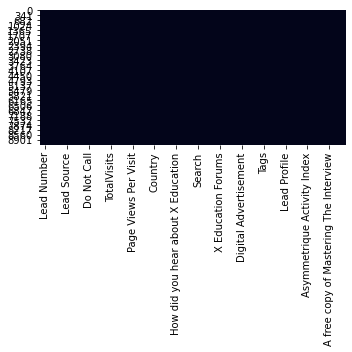

In [153]:
plt.figure(figsize=(5,5))
sns.heatmap(leads.isnull(), cbar=False)

plt.tight_layout()
plt.show()

## Explorartory Data Analysis
#### Let us try and understand the data now based on each columns effect on the conversion rates

In [154]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9204 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9204 non-null   int64  
 1   Lead Origin                             9204 non-null   object 
 2   Lead Source                             9204 non-null   object 
 3   Do Not Email                            9204 non-null   object 
 4   Do Not Call                             9204 non-null   object 
 5   Converted                               9204 non-null   int64  
 6   TotalVisits                             9204 non-null   float64
 7   Total Time Spent on Website             9204 non-null   int64  
 8   Page Views Per Visit                    9204 non-null   float64
 9   Last Activity                           9204 non-null   object 
 10  Country                                 9204 non-null   obje

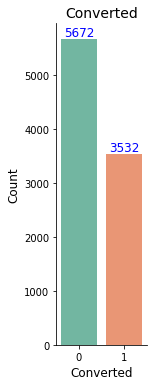

In [155]:
# Conversion Rate 

plot = sns.catplot(x="Converted", kind="count", data=leads, palette="Set2", aspect= 0.4);

plt.title('Converted', fontsize = 14)
plt.xlabel("Converted", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')
    
plt.show()

From the above graph, there has been a overall conversion rate of around 65%

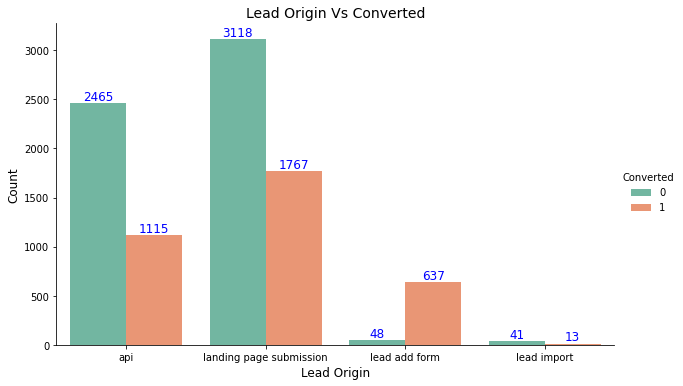

In [156]:
# Lead Origin

plot = sns.catplot(x="Lead Origin", hue = "Converted", kind="count", data=leads, palette="Set2", aspect= 1.7);

plt.title('Lead Origin Vs Converted', fontsize = 14)
plt.xlabel("Lead Origin", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
    
plt.show()

From the above graph, it can be seen that the maximum conversion happened from Landing Page Submission 

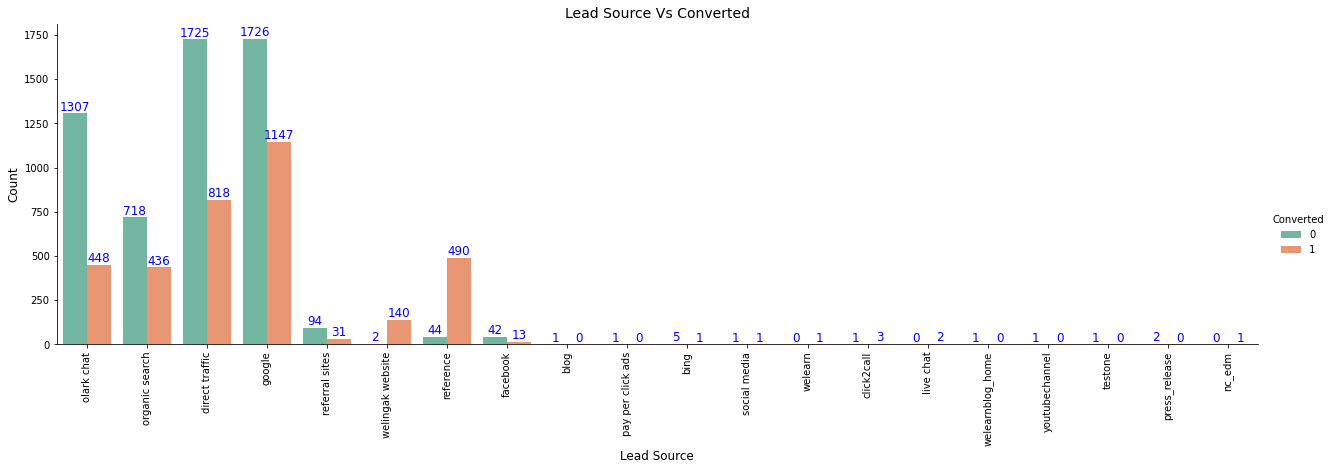

In [157]:
# Lead Source

plot = sns.catplot(x="Lead Source", hue = "Converted", kind="count", data=leads, palette="Set2", aspect = 3.5);

plt.title('Lead Source Vs Converted', fontsize = 14)
plt.xlabel("Lead Source", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
   
plt.show()

From the above graph, it can be seen that major conversion in the lead source is from google

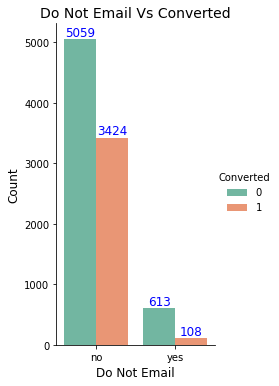

In [158]:

# Do not Email

plot = sns.catplot(x="Do Not Email", hue = "Converted", kind="count", data=leads, palette="Set2", aspect = 0.6);

plt.title('Do Not Email Vs Converted', fontsize = 14)
plt.xlabel("Do Not Email", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Based on the above graph, major conversion has happend from the emails that have been sent

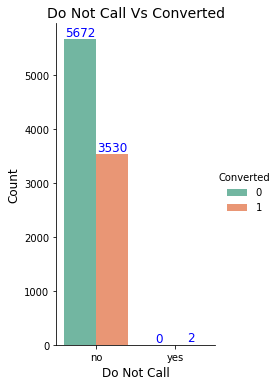

In [159]:
# Do not Call

plot = sns.catplot(x="Do Not Call", hue = "Converted", kind="count", data=leads, palette="Set2", aspect = 0.6);

plt.title('Do Not Call Vs Converted', fontsize = 14)
plt.xlabel("Do Not Call", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

From the above graph , it can be noticed that major conversions happened when calls were made. However, it can also be seen that 1 leads opted for "Do Not Call", but they still got converted.

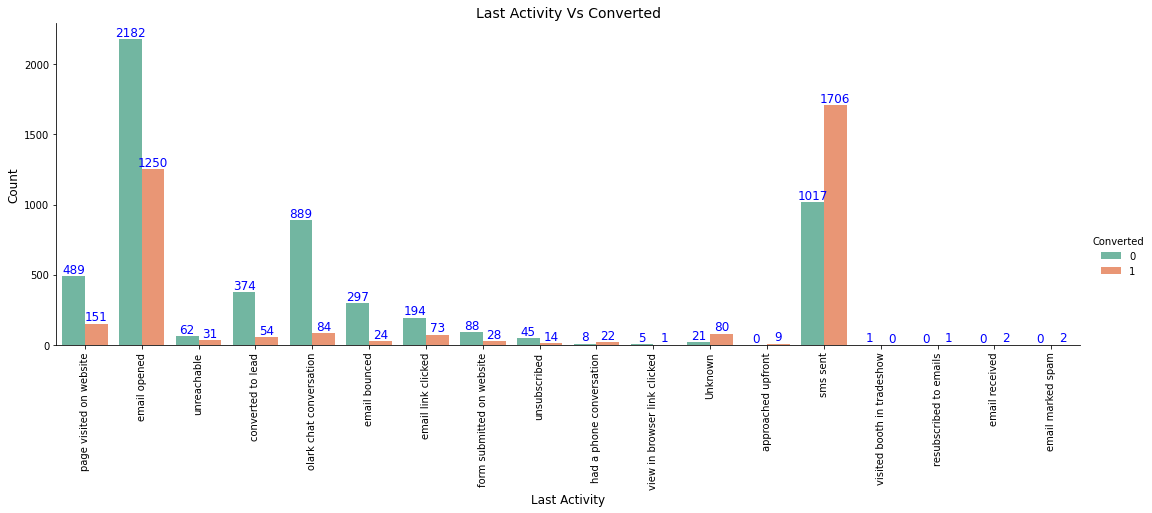

In [160]:
# Last Activity

plot = sns.catplot(x="Last Activity", hue = "Converted", kind="count", data=leads, palette="Set2", aspect = 3.0);

plt.title('Last Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

As per the above graph, last activity value of 'SMS Sent' had more conversion

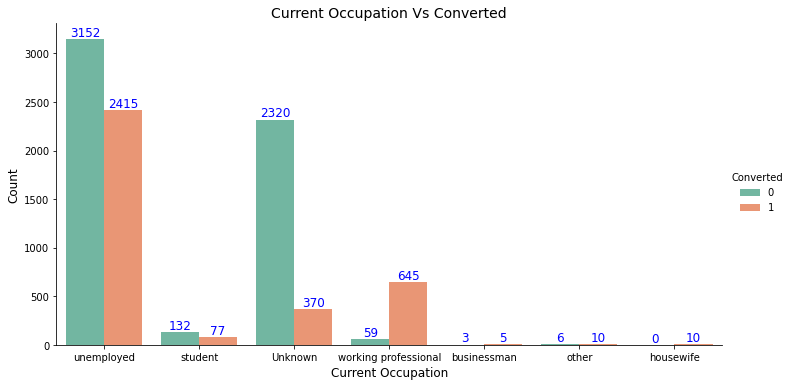

In [161]:

# What is your current occupation

plot = sns.catplot(x="What is your current occupation", hue = "Converted", kind="count", data=leads, palette="Set2", 
                   aspect = 2.0);

plt.title('Current Occupation Vs Converted', fontsize = 14)
plt.xlabel("Current Occupation", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

More conversion happend with people who are unemployed. It can also be noticed from the above data that

- Out of 4 business men, 2 got converted
- Out 3 housewives, all 3 leads got converted.

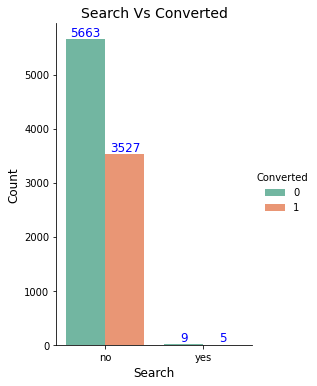

In [162]:
# Search

plot = sns.catplot(x="Search", hue = "Converted", kind="count", data=leads, palette="Set2", aspect = 0.7);

plt.title('Search Vs Converted', fontsize = 14)
plt.xlabel("Search", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Conversion rate is high on leads who are not through search

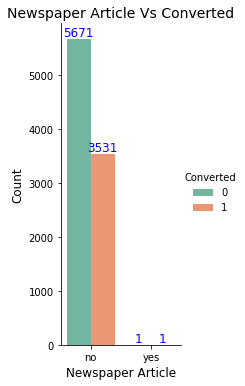

In [163]:
# Newspaper Article

plot = sns.catplot(x="Newspaper Article", hue = "Converted", kind="count", data=leads, palette="Set2", aspect = 0.5);

plt.title('Newspaper Article Vs Converted', fontsize = 14)
plt.xlabel("Newspaper Article", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Since "Newspaper Article" column now has only one value for all rows in "YES" , it is safe to drop this column

posx and posy should be finite values
posx and posy should be finite values


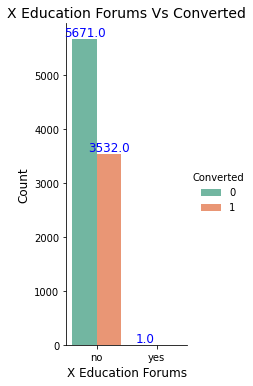

In [164]:
# X Education Forums

plot = sns.catplot(x="X Education Forums", hue = "Converted", kind="count", data=leads, palette="Set2", aspect = 0.5);

plt.title('X Education Forums Vs Converted', fontsize = 14)
plt.xlabel("X Education Forums", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Since "X Education Forums" column now has only one value for all rows in "Yes" , it is safe to drop this column

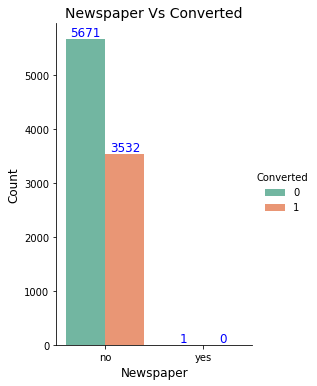

In [165]:
# Newspaper
plot = sns.catplot(x="Newspaper", hue = "Converted", kind="count", data=leads, palette="Set2", aspect = 0.7);

plt.title('Newspaper Vs Converted', fontsize = 14)
plt.xlabel("Newspaper", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')


Since Newspaper column has only one row with "Yes" as the value and further since this lead did not get converted and rest of all the values are "No", we can safely drop the column

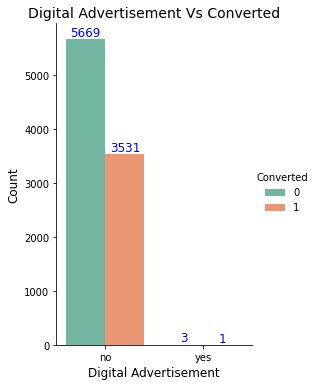

In [166]:
# Digital Advertisement

plot = sns.catplot(x="Digital Advertisement", hue = "Converted", kind="count", data=leads, palette="Set2", aspect = 0.7);

plt.title('Digital Advertisement Vs Converted', fontsize = 14)
plt.xlabel("Digital Advertisement", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

It can be noticed above that there were 4 leads that came from digital advertisement of which one lead got converted

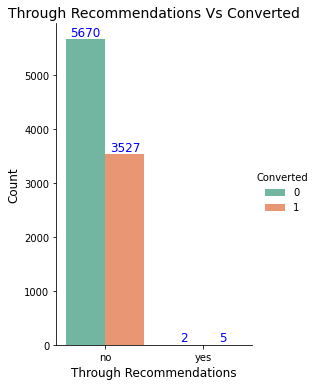

In [167]:
# Through Recommendations

plot = sns.catplot(x="Through Recommendations", hue = "Converted", kind="count", data=leads, palette="Set2", aspect = 0.7);

plt.title('Through Recommendations Vs Converted', fontsize = 14)
plt.xlabel("Through Recommendations", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

It can be seen that a total of 7 leads came through recommendations of which 5 leads got converted



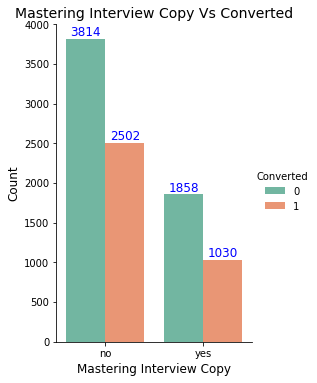

In [168]:

plot = sns.catplot(x="A free copy of Mastering The Interview", hue = "Converted", kind="count", data=leads, palette="Set2",
                   aspect = 0.7);

plt.title('Mastering Interview Copy Vs Converted', fontsize = 14)
plt.xlabel("Mastering Interview Copy", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Conversion rate is high on leads who do not want a free copy of Mastering Interviews

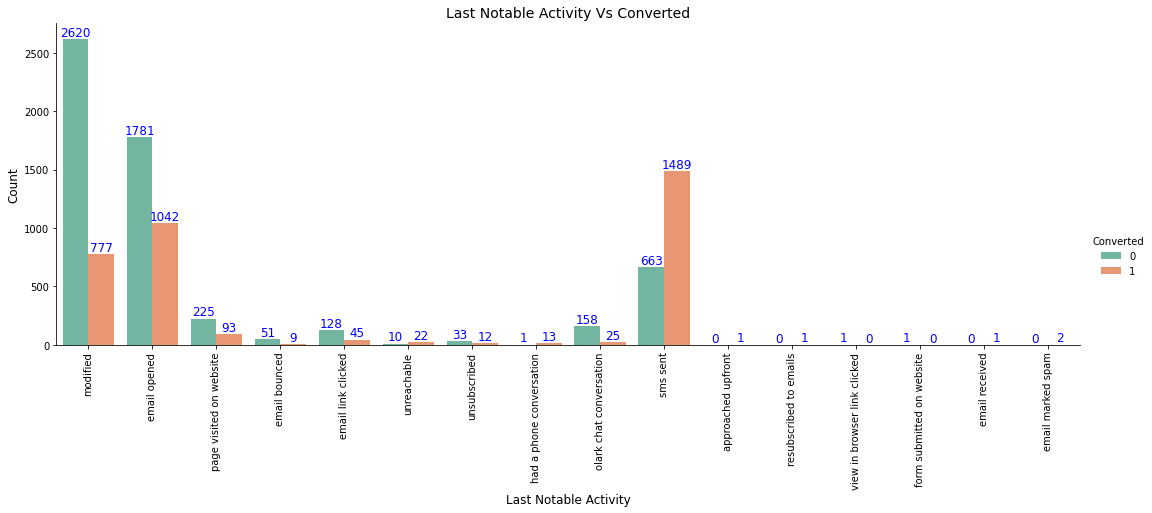

In [169]:

# Last Notable Activity

plot = sns.catplot(x="Last Notable Activity", hue = "Converted", kind="count", data=leads, palette="Set2", aspect = 3.0);

plt.title('Last Notable Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Notable Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

It can be noticed that the conversion rate is high for "SMS Sent"

In [170]:
# Dropping Newspaper column, Newspaper Article & X Education Forum column

leads = leads.drop(['Newspaper', 'X Education Forums', 'Newspaper Article'], axis=1)


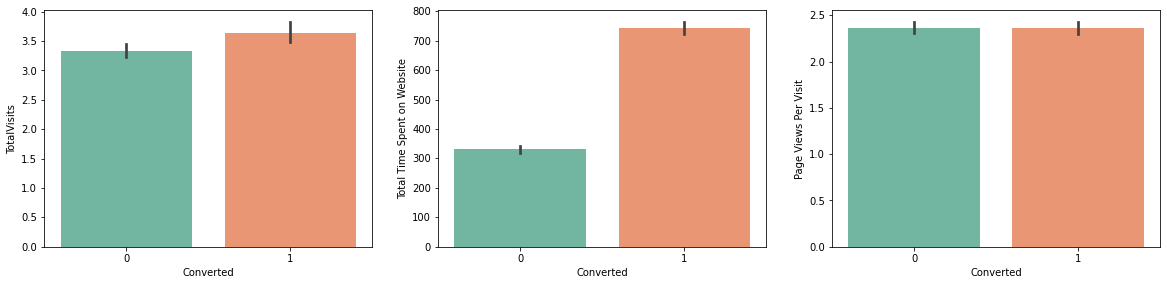

In [171]:
# Now check the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set2', data = leads)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = leads)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set2', data = leads)
plt.show()

The conversion rated were high for Total Visits, Total Time Spent on Website and Page Views Per Visit

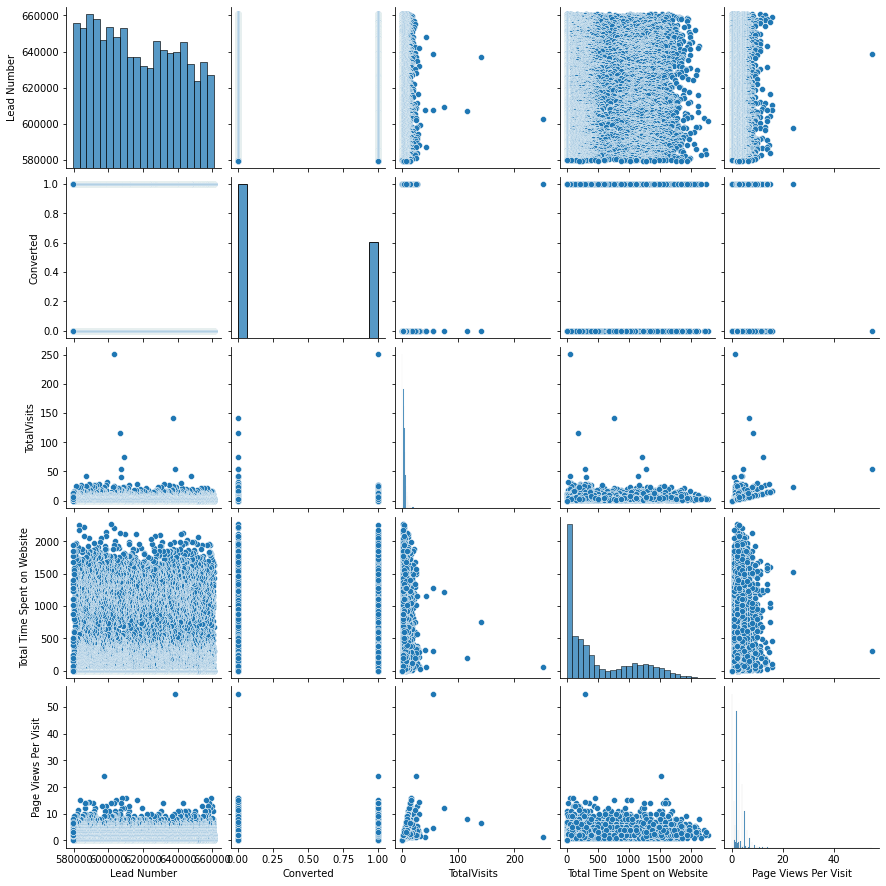

In [172]:
#visualizing numerical value
sns.pairplot(leads)

Inference:
- Conversion 0 or 1 has similar visualization irrespective of page views per visit & Total time spent on website where as for total visits count is more for conversion 0.



# Outlier Treatment

In [173]:
# Checking outliers at 05%,10%,50%,75%,90%,95% and 99%
leads.describe(percentiles=[.05,0.1,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9204.000000,9204.000000,9204.000000,9204.000000,9204.000000
mean,617194.608648,0.383746,3.449587,489.005541,2.364923
std,23418.830233,0.486324,4.824662,547.980340,2.145999
min,579533.000000,0.000000,0.000000,0.000000,0.000000
5%,582868.300000,0.000000,0.000000,0.000000,0.000000
10%,586357.600000,0.000000,0.000000,0.000000,0.000000
50%,615479.000000,0.000000,3.000000,250.000000,2.000000
75%,637409.250000,1.000000,5.000000,938.000000,3.000000
90%,650513.100000,1.000000,7.000000,1380.000000,5.000000
95%,655405.850000,1.000000,10.000000,1562.000000,6.000000


In [174]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9204 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9204 non-null   int64  
 1   Lead Origin                             9204 non-null   object 
 2   Lead Source                             9204 non-null   object 
 3   Do Not Email                            9204 non-null   object 
 4   Do Not Call                             9204 non-null   object 
 5   Converted                               9204 non-null   int64  
 6   TotalVisits                             9204 non-null   float64
 7   Total Time Spent on Website             9204 non-null   int64  
 8   Page Views Per Visit                    9204 non-null   float64
 9   Last Activity                           9204 non-null   object 
 10  Country                                 9204 non-null   obje

In [175]:
numeric_variables = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
print(numeric_variables)

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


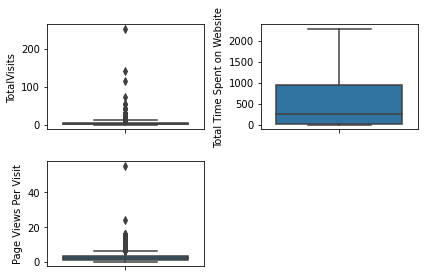

In [176]:
#Drawing boxplot for outlier analysis

def outlier_analysis_boxplot(numeric):
  for idx, variable in enumerate(numeric):
    plt.subplot(2, 2, (idx + 1))
    sns.boxplot(y=variable, data=leads)
  plt.tight_layout()
  plt.show()
outlier_analysis_boxplot(numeric_variables)

We can see from earlier data that after 99th percentile there seems to be an outlier in all the 3 numeric variable. So we will perform the treatment on it.

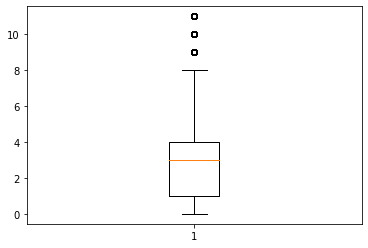

In [177]:
#def outlier_treatment(leads, variable):
Q1 = leads['TotalVisits'].quantile(0.25)
Q3 = leads['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1
leads = leads[(leads['TotalVisits'] >= Q1 - 1.5*IQR) & (leads['TotalVisits'] <= Q3 + 1.5*IQR)]
plt.boxplot(leads['TotalVisits'])
plt.show()

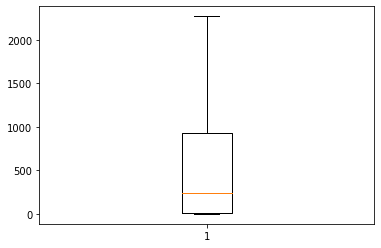

In [178]:
Q1 = leads['Total Time Spent on Website'].quantile(0.25)
Q3 = leads['Total Time Spent on Website'].quantile(0.75)
IQR = Q3 - Q1
leads = leads[(leads['Total Time Spent on Website'] >= Q1 - 1.5*IQR) & (leads['Total Time Spent on Website'] <= Q3 + 1.5*IQR)]
plt.boxplot(leads['Total Time Spent on Website'])
plt.show()

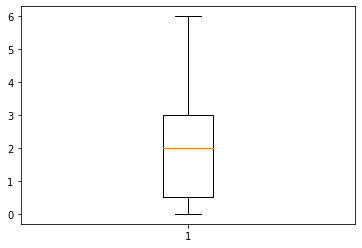

In [179]:
Q1 = leads['Page Views Per Visit'].quantile(0.25)
Q3 = leads['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
leads = leads[(leads['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (leads['Page Views Per Visit'] <= Q3 + 1.5*IQR)]
plt.boxplot(leads['Page Views Per Visit'])
plt.show()

In [180]:
leads.describe(percentiles=[.05,0.1,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000
mean,617165.965174,0.382159,2.822747,478.066296,2.082197
std,23377.198006,0.485943,2.416063,546.161627,1.640114
min,579533.000000,0.000000,0.000000,0.000000,0.000000
5%,582834.200000,0.000000,0.000000,0.000000,0.000000
10%,586327.000000,0.000000,0.000000,0.000000,0.000000
50%,615563.000000,0.000000,3.000000,239.000000,2.000000
75%,637241.000000,1.000000,4.000000,914.000000,3.000000
90%,650309.800000,1.000000,6.000000,1373.000000,4.000000
95%,655348.300000,1.000000,7.000000,1557.000000,5.000000


In [181]:
leads.shape

(8643, 25)

In [182]:
# identify columns with 2 unique values and not type int64
cols = leads.columns
binaryValues = []
for col in cols:
  print(leads[col].dtypes)
  if leads[col].nunique() == 2 and leads[col].dtypes != 'int64':
    binaryValues.append(col)
print(binaryValues)

int64
object
object
object
object
int64
float64
int64
float64
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
['Do Not Email', 'Do Not Call', 'Country', 'Search', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']


In [183]:

leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,Search,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Last Notable Activity
0,660737,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,India,Unknown,Unknown,unemployed,no,no,no,interested in other courses,low in relevance,Unknown,Unknown,02.medium,02.medium,no,modified
1,660728,api,organic search,no,no,0,5.0,674,2.5,email opened,Outside India,Unknown,Unknown,unemployed,no,no,no,ringing,Unknown,Unknown,Unknown,02.medium,02.medium,no,email opened
2,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,Outside India,business administration,Unknown,student,no,no,no,will revert after reading the email,might be,potential lead,mumbai,02.medium,01.high,yes,email opened
3,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,Outside India,media and advertising,word of mouth,unemployed,no,no,no,ringing,not sure,Unknown,mumbai,02.medium,01.high,no,modified
4,660681,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,Outside India,Unknown,other,unemployed,no,no,no,will revert after reading the email,might be,Unknown,mumbai,02.medium,01.high,no,modified


# Data Preparation
 **Treating Categorical Variables dummy variables**

**As there were columns with field value as Unknown, we can categorize them and drop the Unknown values**

In [184]:
# Create dummy variables for the categorical columns and drop first to have lesser columns
# leads_dummy = pd.get_dummies(leads[['Country', 'Lead Source','Lead Origin','Last Notable Activity', 'Do Not Email', 'Do Not Call', 'Search', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']], drop_first=True)

# Merge 2 dataframes
# leads = pd.concat([leads, leads_dummy], axis=1)
#leads.shape

In [185]:
unknown_list = (leads == 'Unknown').idxmax(axis=1)
unknown_list = list(set(unknown_list.tolist()))

In [186]:
unknown_list.remove('Lead Number')

In [187]:
leads['Lead Quality'].value_counts()

Unknown              4493
might be             1447
not sure             1005
high in relevance     584
worst                 572
low in relevance      542
Name: Lead Quality, dtype: int64

In [188]:
known_list = ['Country', 'Lead Source','Lead Origin','Last Notable Activity', 'Do Not Email', 'Do Not Call', 'Search', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview' ]
cols_cat = known_list + unknown_list
cols_cat

['Country',
 'Lead Source',
 'Lead Origin',
 'Last Notable Activity',
 'Do Not Email',
 'Do Not Call',
 'Search',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview',
 'Lead Quality',
 'Asymmetrique Activity Index',
 'How did you hear about X Education',
 'Last Activity',
 'What is your current occupation',
 'Tags',
 'Lead Profile',
 'Specialization']

In [189]:
leads['Asymmetrique Profile Index'].value_counts()

Unknown      3968
02.medium    2625
01.high      2024
03.low         26
Name: Asymmetrique Profile Index, dtype: int64

In [190]:
unknown_list.append('Asymmetrique Profile Index')
cols_cat.append('Asymmetrique Profile Index')

In [191]:
unknown_list

['Lead Quality',
 'Asymmetrique Activity Index',
 'How did you hear about X Education',
 'Last Activity',
 'What is your current occupation',
 'Tags',
 'Lead Profile',
 'Specialization',
 'Asymmetrique Profile Index']

In [192]:
def remove_unknown_after_dummies(leads, unknown_list):
  for var in unknown_list:
    df_temp1 = pd.get_dummies(leads[var], prefix=var)
    # Dropping the level 'Unknown' 
    df_temp2 = df_temp1.drop([(var+'_Unknown')], 1)
    #Adding the results to the master dataframe
    leads = pd.concat([leads, df_temp2], axis=1)
  return leads

In [193]:
leads = remove_unknown_after_dummies(leads, unknown_list)
leads

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,Search,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Last Notable Activity,Lead Quality_high in relevance,Lead Quality_low in relevance,Lead Quality_might be,Lead Quality_not sure,Lead Quality_worst,Asymmetrique Activity Index_01.high,Asymmetrique Activity Index_02.medium,Asymmetrique Activity Index_03.low,How did you hear about X Education_advertisements,How did you hear about X Education_email,How did you hear about X Education_multiple sources,How did you hear about X Education_online search,How did you hear about X Education_other,How did you hear about X Education_sms,How did you hear about X Education_social media,...,Tags_lost to eins,Tags_lost to others,Tags_not doing further education,Tags_number not provided,Tags_opp hangup,Tags_recognition issue (dec approval),Tags_ringing,Tags_shall take in the next coming month,Tags_still thinking,Tags_switched off,Tags_university not recognized,Tags_want to take admission but has financial problems,Tags_will revert after reading the email,Tags_wrong number given,Lead Profile_dual specialization student,Lead Profile_lateral student,Lead Profile_other leads,Lead Profile_potential lead,Lead Profile_student of someschool,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_operations management,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,Asymmetrique Profile Index_01.high,Asymmetrique Profile Index_02.medium,Asymmetrique Profile Index_03.low
0,660737,api,olark chat,no,no,0,0.0,0,0.00,page visited on website,India,Unknown,Unknown,unemployed,no,no,no,interested in other courses,low in relevance,Unknown,Unknown,02.medium,02.medium,no,modified,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,660728,api,organic search,no,no,0,5.0,674,2.50,email opened,Outside India,Unknown,Unknown,unemployed,no,no,no,ringing,Unknown,Unknown,Unknown,02.medium,02.medium,no,email opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,email opened,Outside India,business administration,Unknown,student,no,no,no,will revert after reading the email,might be,potential lead,mumbai,02.medium,01.high,yes,email opened,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.00,unreachable,Outside India,media and advertising,word of mouth,unemployed,no,no,no,ringing,not sure,Unknown,mumbai,02.medium,01.high,no,modified,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,660681,landing page submission,google,no,no,1,2.0,1428,1.00,converted to lead,Outside India,Unknown,other,unemployed,no,no,no,will revert after reading the email,might be,Unknown,mumbai,02.medium,01.high,no,modified,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [194]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
df_temp3 = pd.get_dummies(leads[known_list], drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([leads, df_temp3], axis=1)

In [195]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,Search,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Last Notable Activity,Lead Quality_high in relevance,Lead Quality_low in relevance,Lead Quality_might be,Lead Quality_not sure,Lead Quality_worst,Asymmetrique Activity Index_01.high,Asymmetrique Activity Index_02.medium,Asymmetrique Activity Index_03.low,How did you hear about X Education_advertisements,How did you hear about X Education_email,How did you hear about X Education_multiple sources,How did you hear about X Education_online search,How did you hear about X Education_other,How did you hear about X Education_sms,How did you hear about X Education_social media,...,Lead Source_facebook,Lead Source_google,Lead Source_live chat,Lead Source_nc_edm,Lead Source_olark chat,Lead Source_organic search,Lead Source_pay per click ads,Lead Source_press_release,Lead Source_reference,Lead Source_referral sites,Lead Source_social media,Lead Source_testone,Lead Source_welearn,Lead Source_welearnblog_home,Lead Source_welingak website,Lead Source_youtubechannel,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Last Notable Activity_email bounced,Last Notable Activity_email link clicked,Last Notable Activity_email marked spam,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked,Do Not Email_yes,Do Not Call_yes,Search_yes,Digital Advertisement_yes,Through Recommendations_yes,A free copy of Mastering The Interview_yes
0,660737,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,India,Unknown,Unknown,unemployed,no,no,no,interested in other courses,low in relevance,Unknown,Unknown,02.medium,02.medium,no,modified,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,660728,api,organic search,no,no,0,5.0,674,2.5,email opened,Outside India,Unknown,Unknown,unemployed,no,no,no,ringing,Unknown,Unknown,Unknown,02.medium,02.medium,no,email opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,Outside India,business administration,Unknown,student,no,no,no,will revert after reading the email,might be,potential lead,mumbai,02.medium,01.high,yes,email opened,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,Outside India,media and advertising,word of mouth,unemployed,no,no,no,ringing,not sure,Unknown,mumbai,02.medium,01.high,no,modified,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,660681,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,Outside India,Unknown,other,unemployed,no,no,no,will revert after reading the email,might be,Unknown,mumbai,02.medium,01.high,no,modified,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [196]:
leads = leads.drop(cols_cat, 1)
leads.shape

(8643, 142)

In [197]:
leads = leads.drop('City', 1)

In [198]:
original_leads = leads.copy()
print(original_leads.shape)
print(leads.shape)

(8643, 141)
(8643, 141)


***Test train split***

In [199]:
from sklearn.model_selection import train_test_split

In [200]:
# The feature variables should be moved to X
X = leads.drop(['Converted', 'Lead Number'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Quality_high in relevance,Lead Quality_low in relevance,Lead Quality_might be,Lead Quality_not sure,Lead Quality_worst,Asymmetrique Activity Index_01.high,Asymmetrique Activity Index_02.medium,Asymmetrique Activity Index_03.low,How did you hear about X Education_advertisements,How did you hear about X Education_email,How did you hear about X Education_multiple sources,How did you hear about X Education_online search,How did you hear about X Education_other,How did you hear about X Education_sms,How did you hear about X Education_social media,How did you hear about X Education_student of someschool,How did you hear about X Education_word of mouth,Last Activity_approached upfront,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email marked spam,Last Activity_email opened,Last Activity_email received,Last Activity_form submitted on website,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_resubscribed to emails,Last Activity_sms sent,Last Activity_unreachable,Last Activity_unsubscribed,Last Activity_view in browser link clicked,Last Activity_visited booth in tradeshow,What is your current occupation_businessman,What is your current occupation_housewife,What is your current occupation_other,...,Lead Source_facebook,Lead Source_google,Lead Source_live chat,Lead Source_nc_edm,Lead Source_olark chat,Lead Source_organic search,Lead Source_pay per click ads,Lead Source_press_release,Lead Source_reference,Lead Source_referral sites,Lead Source_social media,Lead Source_testone,Lead Source_welearn,Lead Source_welearnblog_home,Lead Source_welingak website,Lead Source_youtubechannel,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Last Notable Activity_email bounced,Last Notable Activity_email link clicked,Last Notable Activity_email marked spam,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked,Do Not Email_yes,Do Not Call_yes,Search_yes,Digital Advertisement_yes,Through Recommendations_yes,A free copy of Mastering The Interview_yes
0,0.0,0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1.0,305,1.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,1428,1.0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [201]:
# The output variables should be put in y
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [202]:
# Lets split the data into test and train for the model
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)



# Feature Scaling for uniform scale of data



In [203]:
from sklearn.preprocessing import StandardScaler

In [204]:
# consider numeric variables and scale them
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Quality_high in relevance,Lead Quality_low in relevance,Lead Quality_might be,Lead Quality_not sure,Lead Quality_worst,Asymmetrique Activity Index_01.high,Asymmetrique Activity Index_02.medium,Asymmetrique Activity Index_03.low,How did you hear about X Education_advertisements,How did you hear about X Education_email,How did you hear about X Education_multiple sources,How did you hear about X Education_online search,How did you hear about X Education_other,How did you hear about X Education_sms,How did you hear about X Education_social media,How did you hear about X Education_student of someschool,How did you hear about X Education_word of mouth,Last Activity_approached upfront,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email marked spam,Last Activity_email opened,Last Activity_email received,Last Activity_form submitted on website,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_resubscribed to emails,Last Activity_sms sent,Last Activity_unreachable,Last Activity_unsubscribed,Last Activity_view in browser link clicked,Last Activity_visited booth in tradeshow,What is your current occupation_businessman,What is your current occupation_housewife,What is your current occupation_other,...,Lead Source_facebook,Lead Source_google,Lead Source_live chat,Lead Source_nc_edm,Lead Source_olark chat,Lead Source_organic search,Lead Source_pay per click ads,Lead Source_press_release,Lead Source_reference,Lead Source_referral sites,Lead Source_social media,Lead Source_testone,Lead Source_welearn,Lead Source_welearnblog_home,Lead Source_welingak website,Lead Source_youtubechannel,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Last Notable Activity_email bounced,Last Notable Activity_email link clicked,Last Notable Activity_email marked spam,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked,Do Not Email_yes,Do Not Call_yes,Search_yes,Digital Advertisement_yes,Through Recommendations_yes,A free copy of Mastering The Interview_yes
5720,0.497461,1.974846,1.161899,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7026,-1.170391,-0.876707,-1.266501,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6968,1.331387,1.265159,-0.052301,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5016,-1.170391,-0.876707,-1.266501,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6653,-0.336465,0.705457,-0.052301,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [205]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6050 entries, 5720 to 6034
Columns: 139 entries, TotalVisits to A free copy of Mastering The Interview_yes
dtypes: float64(3), uint8(136)
memory usage: 992.6 KB


In [206]:
X_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Quality_high in relevance,Lead Quality_low in relevance,Lead Quality_might be,Lead Quality_not sure,Lead Quality_worst,Asymmetrique Activity Index_01.high,Asymmetrique Activity Index_02.medium,Asymmetrique Activity Index_03.low,How did you hear about X Education_advertisements,How did you hear about X Education_email,How did you hear about X Education_multiple sources,How did you hear about X Education_online search,How did you hear about X Education_other,How did you hear about X Education_sms,How did you hear about X Education_social media,How did you hear about X Education_student of someschool,How did you hear about X Education_word of mouth,Last Activity_approached upfront,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email marked spam,Last Activity_email opened,Last Activity_email received,Last Activity_form submitted on website,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_resubscribed to emails,Last Activity_sms sent,Last Activity_unreachable,Last Activity_unsubscribed,Last Activity_view in browser link clicked,Last Activity_visited booth in tradeshow,What is your current occupation_businessman,What is your current occupation_housewife,What is your current occupation_other,...,Lead Source_facebook,Lead Source_google,Lead Source_live chat,Lead Source_nc_edm,Lead Source_olark chat,Lead Source_organic search,Lead Source_pay per click ads,Lead Source_press_release,Lead Source_reference,Lead Source_referral sites,Lead Source_social media,Lead Source_testone,Lead Source_welearn,Lead Source_welearnblog_home,Lead Source_welingak website,Lead Source_youtubechannel,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Last Notable Activity_email bounced,Last Notable Activity_email link clicked,Last Notable Activity_email marked spam,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked,Do Not Email_yes,Do Not Call_yes,Search_yes,Digital Advertisement_yes,Through Recommendations_yes,A free copy of Mastering The Interview_yes
count,6.050000e+03,6.050000e+03,6.050000e+03,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.0,6050.000000,6050.000000,6050.000000,6050.000000,6050.0,6050.000000,6050.000000,6050.000000,...,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.0,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.0,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000
mean,-4.164942e-17,-5.895193e-17,-2.936127e-18,0.064463,0.060496,0.173223,0.111901,0.067273,0.083636,0.416694,0.039835,0.007603,0.002479,0.017686,0.085785,0.019174,0.002314,0.006612,0.034711,0.036364,0.000661,0.049917,0.036860,0.029587,0.000165,0.371074,0.000331,0.012231,0.002975,0.110083,0.060826,0.0,0.295868,0.010579,0.006942,0.000496,0.0,0.000496,0.001157,0.001157,...,0.005950,0.320000,0.000331,0.000165,0.2018

# Bulding the model

In [207]:
# Model 1

import statsmodels.api as sm

In [208]:
np.asarray(X_train)

array([[ 0.49746081,  1.9748459 ,  1.16189922, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17039063, -0.87670687, -1.26650106, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.33138653,  1.26515862, -0.05230092, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.33646491,  1.64926772, -0.05230092, ...,  0.        ,
         0.        ,  1.        ],
       [-1.17039063, -0.87670687, -1.26650106, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.08049795, -0.34444141,  0.55479915, ...,  0.        ,
         0.        ,  0.        ]])

In [209]:
X_train

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Quality_high in relevance,Lead Quality_low in relevance,Lead Quality_might be,Lead Quality_not sure,Lead Quality_worst,Asymmetrique Activity Index_01.high,Asymmetrique Activity Index_02.medium,Asymmetrique Activity Index_03.low,How did you hear about X Education_advertisements,How did you hear about X Education_email,How did you hear about X Education_multiple sources,How did you hear about X Education_online search,How did you hear about X Education_other,How did you hear about X Education_sms,How did you hear about X Education_social media,How did you hear about X Education_student of someschool,How did you hear about X Education_word of mouth,Last Activity_approached upfront,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email marked spam,Last Activity_email opened,Last Activity_email received,Last Activity_form submitted on website,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_resubscribed to emails,Last Activity_sms sent,Last Activity_unreachable,Last Activity_unsubscribed,Last Activity_view in browser link clicked,Last Activity_visited booth in tradeshow,What is your current occupation_businessman,What is your current occupation_housewife,What is your current occupation_other,...,Lead Source_facebook,Lead Source_google,Lead Source_live chat,Lead Source_nc_edm,Lead Source_olark chat,Lead Source_organic search,Lead Source_pay per click ads,Lead Source_press_release,Lead Source_reference,Lead Source_referral sites,Lead Source_social media,Lead Source_testone,Lead Source_welearn,Lead Source_welearnblog_home,Lead Source_welingak website,Lead Source_youtubechannel,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Last Notable Activity_email bounced,Last Notable Activity_email link clicked,Last Notable Activity_email marked spam,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked,Do Not Email_yes,Do Not Call_yes,Search_yes,Digital Advertisement_yes,Through Recommendations_yes,A free copy of Mastering The Interview_yes
5720,0.497461,1.974846,1.161899,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7026,-1.170391,-0.876707,-1.266501,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6968,1.331387,1.265159,-0.052301,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5016,-1.170391,-0.876707,-1.266501,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6653,-0.336465,0.705457,-0.052301,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,-0.753428,-0.485281,-0.659401,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,

In [210]:
logm1 = sm.GLM(y_train.astype(float),(sm.add_constant(X_train.astype(float))), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6050
Model:                            GLM   Df Residuals:                     5917
Model Family:                Binomial   Df Model:                          132
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 11 Jan 2021   Deviance:                          nan
Time:                        12:12:36   Pearson chi2:                 2.50e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                     7.484e+14   3.17e+07   2.36e+07      0.000    7.48e+14    7.48e+14
TotalVisits                                               9.324e+13   1.48e+06   6.32e+07      0.000    9.32e+13    9.32e+13
Total Time Spent on Website                                3.72e+14   1.08e+06   3.46e+08      0.000    3.72e+14    3.72e+14
Page Views Per Visit                                     -1.315e+14   1.62e+06   -8.1e+07      0.000   -1.32e+14   -1.32e+14
Lead Quality_high in relevance                            1.903e+14   5.53e+06   3.44e+07      0.000     1.9e+14     1.9e+14
Lead Quality_low in relevance                            -2.078e+13   5.32e+06  -3.91e+06      0.000   -2.08e+13   -2.08e+13
Lead Quality_might be                                    -6.311e+13      4e+06  -1.58e+07      0.000   -6.31e+13   -6.31e+13
Lead Quality_not sure                                     1.515e+14   3.66e+06   4.14e+07      0.000    1.52e+14    1.52e+14
Lead Quality_worst                                       -2.281e+14   5.64e+06  -4.04e+07      0.000   -2.28e+14   -2.28e+14
Asymmetrique Activity Index_01.high                       1.668e+14   4.25e+06   3.93e+07      0.000    1.67e+14    1.67e+14
Asymmetrique Activity Index_02.medium                     1.843e+14   3.46e+06   5.33e+07      0.000    1.84e+14    1.84e+14
Asymmetrique Activity Index_03.low                       -4.821e+14   5.05e+06  -9.55e+07      0.000   -4.82e+14   -4.82e+14
How did you hear about X Education_advertisements        -1.612e+14   1.09e+07  -1.47e+07      0.000   -1.61e+14   -1.61e+14
How did you hear about X Education_email                  4.949e+14   1.78e+07   2.77e+07      0.000    4.95e+14    4.95e+14
How did you hear about X Education_multiple sources      -2.509e+14   7.47e+06  -3.36e+07      0.000   -2.51e+14   -2.51e+14
How did you hear about X Education_online search          4.002e+13   4.69e+06   8.53e+06      0.000       4e+13       4e+13
How did you hear about X Education_other                  9.864e+12   7.36e+06   1.34e+06      0.000    9.86e+12    9.86e+12
How did you hear about X Education_sms                    2.082e+14   1.85e+07   1.13e+07      0.000    2.08e+14    2.08e+14
How did you hear about X Education_social media           6.365e+13   1.15e+07   5.55e+06      0.000    6.37e+13    6.37e+13
How did you hear about X Education_student of someschool  1.938e+14   5.85e+06   3.31e+07      0.000    1.94e+14    1.94e+14
How did you hear about X Education_word of mouth          6.105e+13   5.87e+06   1.04e+07      0.000    6.11e+13    6.11e+13
Last Activity_approached upfront                          5.048e+15   3.48e+07   1.

# Feature Selection


In [211]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [212]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [213]:
rfe.support_

array([False, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True,  True,  True, False,
        True,  True, False, False, False,  True, False,  True,  True,
       False,  True, False,  True,  True,  True, False,  True, False,
       False,  True, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [214]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 55),
 ('Total Time Spent on Website', False, 8),
 ('Page Views Per Visit', False, 54),
 ('Lead Quality_high in relevance', False, 10),
 ('Lead Quality_low in relevance', False, 101),
 ('Lead Quality_might be', False, 25),
 ('Lead Quality_not sure', False, 80),
 ('Lead Quality_worst', True, 1),
 ('Asymmetrique Activity Index_01.high', False, 62),
 ('Asymmetrique Activity Index_02.medium', False, 63),
 ('Asymmetrique Activity Index_03.low', True, 1),
 ('How did you hear about X Education_advertisements', False, 75),
 ('How did you hear about X Education_email', False, 46),
 ('How did you hear about X Education_multiple sources', False, 51),
 ('How did you hear about X Education_online search', False, 106),
 ('How did you hear about X Education_other', False, 84),
 ('How did you hear about X Education_sms', False, 95),
 ('How did you hear about X Education_social media', False, 71),
 ('How did you hear about X Education_student of someschool', False, 21),
 ('How di

In [215]:
# Get columns from RFE
col = X_train.columns[rfe.support_]
col

Index(['Lead Quality_worst', 'Asymmetrique Activity Index_03.low',
       'Last Activity_sms sent', 'What is your current occupation_unemployed',
       'What is your current occupation_working professional',
       'Tags_already a student', 'Tags_closed by horizzon',
       'Tags_diploma holder (not eligible)',
       'Tags_interested  in full time mba', 'Tags_interested in other courses',
       'Tags_invalid number', 'Tags_lost to eins',
       'Tags_not doing further education', 'Tags_number not provided',
       'Tags_opp hangup', 'Tags_ringing', 'Tags_switched off',
       'Tags_will revert after reading the email', 'Tags_wrong number given',
       'Lead Source_welingak website'],
      dtype='object')

Lets access the model now

In [216]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6050
Model:                            GLM   Df Residuals:                     6029
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1230.3
Date:                Mon, 11 Jan 2021   Deviance:                       2460.7
Time:                        12:12:54   Pearson chi2:                 8.66e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.6014      0.093    -27.950      0.000      -2.784      -2.419
Lead Quality_worst                                      -1.7187      0.555     -3.100      0.002      -2.806      -0.632
Asymmetrique Activity Index_03.low                      -2.6523      0.353     -7.509      0.000      -3.345      -1.960
Last Activity_sms sent                                   2.1102      0.116     18.265      0.000       1.884       2.337
What is your current occupation_unemployed               2.3063      0.120     19.144      0.000       2.070       2.542
What is your current occupation_working professional     2.4626      0.382      6.446      0.000       1.714       3.211
Tags_already a student                                  -3.7527      0.603     -6.224      0.000      -4.934      -2.571
Tags_closed by horizzon                                  5.1763      0.725      7.141      0.000       3.756       6.597
Tags_diploma holder (not eligible)                     -23.5459   1.85e+04     -0.001      0.999   -3.63e+04    3.63e+04
Tags_interested  in full time mba                       -3.2765      0.741     -4.422      0.000      -4.729      -1.824
Tags_interested in other courses                        -3.3999      0.360     -9.453      0.000      -4.105      -2.695
Tags_invalid number                                     -4.5063      1.031     -4.371      0.000      -6.527      -2.486
Tags_lost to eins                                        5.2071      0.576      9.037      0.000       4.078       6.336
Tags_not doing further education                        -4.1820      1.030     -4.062      0.000      -6.200      -2.164
Tags_number not provided                               -25.2584   2.79e+04     -0.001      0.999   -5.47e+04    5.46e+04
Tags_opp hangup                                         -2.8735      0.788     -3.647      0.000      -4.418      -1.329
Tags_ringing                                            -4.5289      0.255    -17.754      0.000      -5.029      -4.029
Tags_switched off                                       -5.2704      0.726     -7.263      0.000      -6.693      -3.848
Tags_will revert after reading the email                 3.6188      0.206     17.591      0.000       3.216       4.022
Tags_wrong number given                                -25.2157   2.48e+04     -0.001      0.999   -4.87e+04    4.87e+04
Lead Source_welingak website                             3.8734      1.017      3.809      0.000       1.880       5.866
========================================================================================================================
"""

In [217]:
#Get prediction values now
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5720    0.992469
7026    0.069049
6968    0.965231
5016    0.379611
6653    0.859974
7157    0.024245
2521    0.965231
920     0.069049
4731    0.965231
134     0.972835
dtype: float64

In [218]:
# reshaping the numpy array containing predicted values
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.99246893, 0.06904908, 0.9652313 , 0.37961118, 0.85997392,
       0.02424544, 0.9652313 , 0.06904908, 0.9652313 , 0.97283495])

**Creating a dataframe with the actual churn flag and the predicted probabilities**

In [219]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,1,0.992469,5720
1,0,0.069049,7026
2,1,0.965231,6968
3,1,0.379611,5016
4,1,0.859974,6653


Lets keep a threshold of P >= 0.5 for conversion

In [220]:
y_train_pred_final['predicted_churn'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x >= 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted_churn
0,1,0.992469,5720,1
1,0,0.069049,7026,0
2,1,0.965231,6968,1
3,1,0.379611,5016,0
4,1,0.859974,6653,1


**Lets see the confusion metrics**

In [221]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted_churn )
print(confusion)

[[3679   77]
 [ 409 1885]]


In [222]:
# lets check the accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted_churn))

0.9196694214876033


**Lets compute VIFs to know the significance of the model**



In [223]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [224]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Tags_closed by horizzon,1.31
12,Tags_not doing further education,1.26
16,Tags_switched off,1.18
8,Tags_interested in full time mba,1.13
7,Tags_diploma holder (not eligible),1.09
10,Tags_invalid number,1.08
1,Asymmetrique Activity Index_03.low,1.08
19,Lead Source_welingak website,1.08
11,Tags_lost to eins,1.07
14,Tags_opp hangup,1.03


In [225]:
X_train = X_train.drop('Lead Source_welingak website', axis=1)

In [226]:
col.delete(col.get_loc('Lead Source_welingak website'))


Index(['Lead Quality_worst', 'Asymmetrique Activity Index_03.low',
       'Last Activity_sms sent', 'What is your current occupation_unemployed',
       'What is your current occupation_working professional',
       'Tags_already a student', 'Tags_closed by horizzon',
       'Tags_diploma holder (not eligible)',
       'Tags_interested  in full time mba', 'Tags_interested in other courses',
       'Tags_invalid number', 'Tags_lost to eins',
       'Tags_not doing further education', 'Tags_number not provided',
       'Tags_opp hangup', 'Tags_ringing', 'Tags_switched off',
       'Tags_will revert after reading the email', 'Tags_wrong number given'],
      dtype='object')

In [227]:
col = col.delete(19)

In [228]:
col

Index(['Lead Quality_worst', 'Asymmetrique Activity Index_03.low',
       'Last Activity_sms sent', 'What is your current occupation_unemployed',
       'What is your current occupation_working professional',
       'Tags_already a student', 'Tags_closed by horizzon',
       'Tags_diploma holder (not eligible)',
       'Tags_interested  in full time mba', 'Tags_interested in other courses',
       'Tags_invalid number', 'Tags_lost to eins',
       'Tags_not doing further education', 'Tags_number not provided',
       'Tags_opp hangup', 'Tags_ringing', 'Tags_switched off',
       'Tags_will revert after reading the email', 'Tags_wrong number given'],
      dtype='object')

In [229]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6050
Model:                            GLM   Df Residuals:                     6030
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1256.5
Date:                Mon, 11 Jan 2021   Deviance:                       2512.9
Time:                        12:12:55   Pearson chi2:                 8.77e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5874      0.092    -27.999      0.000      -2.769      -2.406
Lead Quality_worst                                      -1.8120      0.552     -3.283      0.001      -2.894      -0.730
Asymmetrique Activity Index_03.low                      -2.7732      0.350     -7.924      0.000      -3.459      -2.087
Last Activity_sms sent                                   2.0932      0.115     18.255      0.000       1.869       2.318
What is your current occupation_unemployed               2.4825      0.118     21.070      0.000       2.252       2.713
What is your current occupation_working professional     2.5606      0.382      6.697      0.000       1.811       3.310
Tags_already a student                                  -3.9194      0.601     -6.519      0.000      -5.098      -2.741
Tags_closed by horizzon                                  5.0909      0.725      7.021      0.000       3.670       6.512
Tags_diploma holder (not eligible)                     -23.7038   1.84e+04     -0.001      0.999   -3.61e+04     3.6e+04
Tags_interested  in full time mba                       -3.4491      0.740     -4.658      0.000      -4.900      -1.998
Tags_interested in other courses                        -3.5759      0.359     -9.973      0.000      -4.279      -2.873
Tags_invalid number                                     -4.6760      1.031     -4.537      0.000      -6.696      -2.656
Tags_lost to eins                                        5.1935      0.582      8.930      0.000       4.054       6.333
Tags_not doing further education                        -4.3488      1.029     -4.226      0.000      -6.366      -2.332
Tags_number not provided                               -25.4280   2.78e+04     -0.001      0.999   -5.46e+04    5.45e+04
Tags_opp hangup                                         -3.0498      0.787     -3.874      0.000      -4.593      -1.507
Tags_ringing                                            -4.7046      0.254    -18.521      0.000      -5.202      -4.207
Tags_switched off                                       -5.4452      0.725     -7.507      0.000      -6.867      -4.024
Tags_will revert after reading the email                 3.5038      0.206     16.978      0.000       3.099       3.908
Tags_wrong number given                                -25.3875   2.48e+04     -0.001      0.999   -4.87e+04    4.86e+04
========================================================================================================================
"""

In [230]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Tags_closed by horizzon,1.31
12,Tags_not doing further education,1.25
16,Tags_switched off,1.17
8,Tags_interested in full time mba,1.12
7,Tags_diploma holder (not eligible),1.09
1,Asymmetrique Activity Index_03.low,1.07
10,Tags_invalid number,1.07
11,Tags_lost to eins,1.07
18,Tags_wrong number given,1.03
14,Tags_opp hangup,1.03


**Not much multicollinearity present**

Now lets check for correlation using heatmap among all the variables

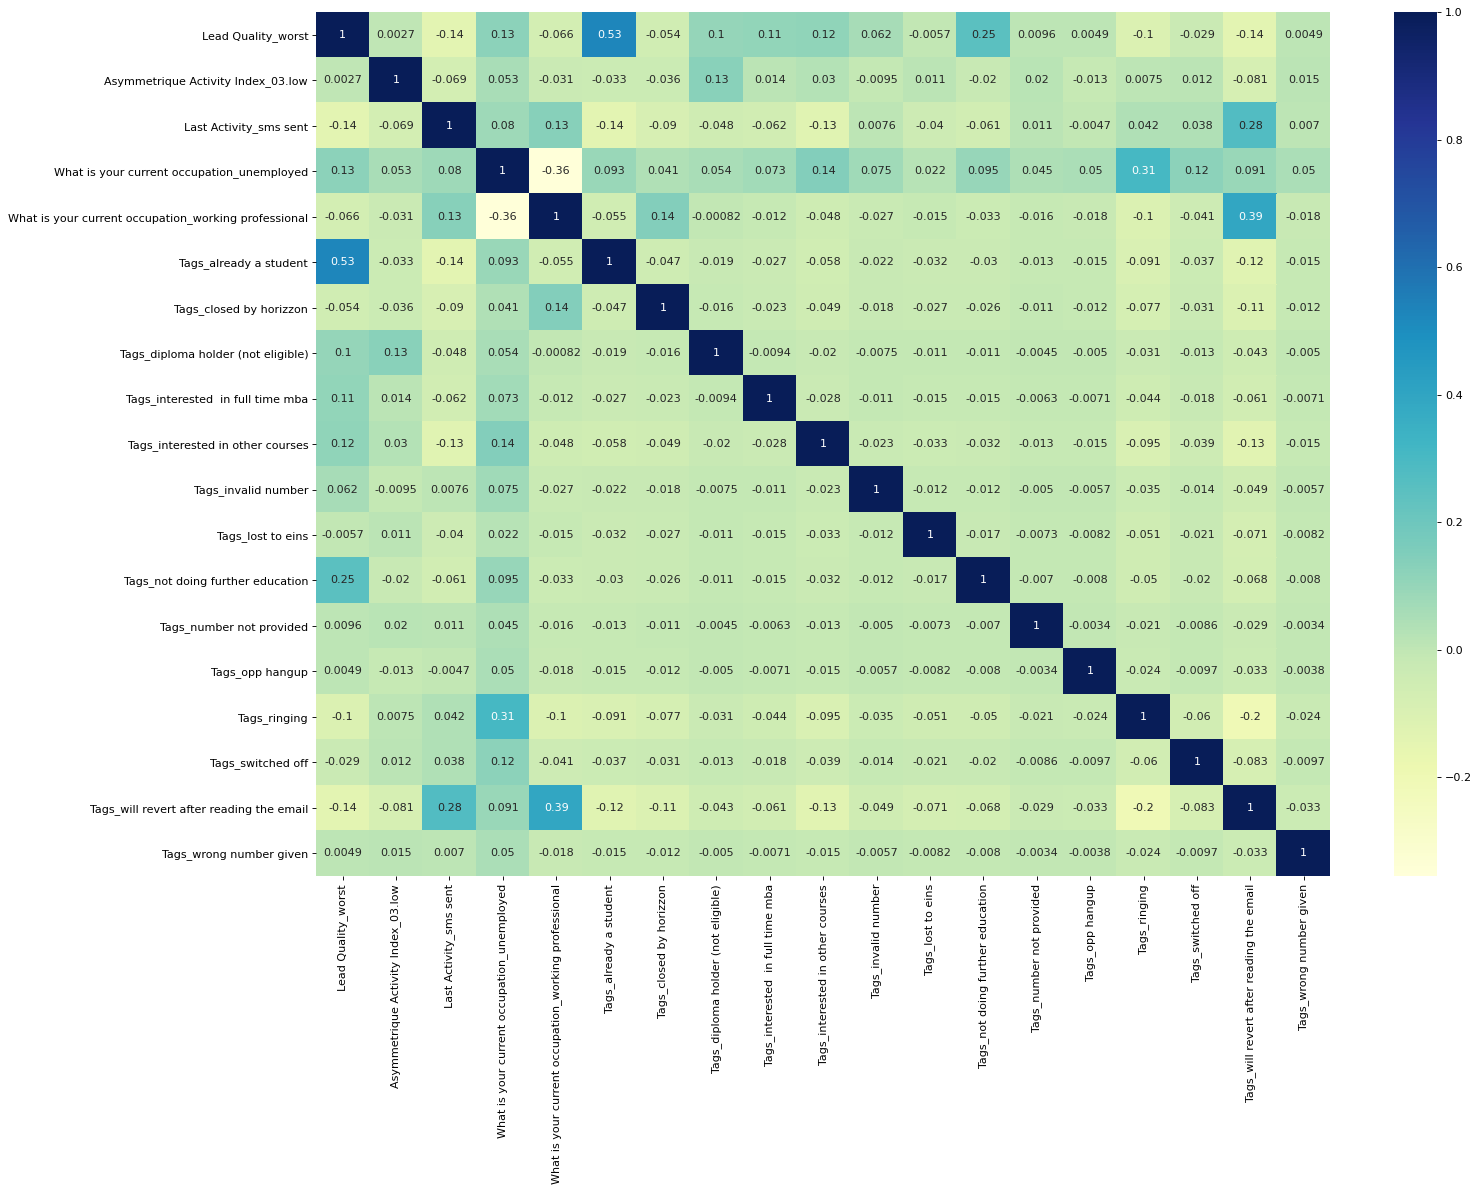

In [231]:
plt.figure(figsize=(20,15), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

We can remove some variables as the p-value is high.

In [232]:
col = col.drop('Tags_number not provided', 1)
col

Index(['Lead Quality_worst', 'Asymmetrique Activity Index_03.low',
       'Last Activity_sms sent', 'What is your current occupation_unemployed',
       'What is your current occupation_working professional',
       'Tags_already a student', 'Tags_closed by horizzon',
       'Tags_diploma holder (not eligible)',
       'Tags_interested  in full time mba', 'Tags_interested in other courses',
       'Tags_invalid number', 'Tags_lost to eins',
       'Tags_not doing further education', 'Tags_opp hangup', 'Tags_ringing',
       'Tags_switched off', 'Tags_will revert after reading the email',
       'Tags_wrong number given'],
      dtype='object')

In [233]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6050
Model:                            GLM   Df Residuals:                     6031
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1274.8
Date:                Mon, 11 Jan 2021   Deviance:                       2549.7
Time:                        12:12:57   Pearson chi2:                 8.58e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5712      0.092    -28.082      0.000      -2.751      -2.392
Lead Quality_worst                                      -1.9669      0.553     -3.557      0.000      -3.051      -0.883
Asymmetrique Activity Index_03.low                      -2.7300      0.349     -7.814      0.000      -3.415      -2.045
Last Activity_sms sent                                   2.0527      0.113     18.158      0.000       1.831       2.274
What is your current occupation_unemployed               2.4019      0.116     20.702      0.000       2.174       2.629
What is your current occupation_working professional     2.5123      0.381      6.586      0.000       1.765       3.260
Tags_already a student                                  -3.8227      0.599     -6.378      0.000      -4.998      -2.648
Tags_closed by horizzon                                  5.1277      0.724      7.079      0.000       3.708       6.547
Tags_diploma holder (not eligible)                     -23.6123   1.84e+04     -0.001      0.999    -3.6e+04     3.6e+04
Tags_interested  in full time mba                       -3.3662      0.740     -4.552      0.000      -4.816      -1.917
Tags_interested in other courses                        -3.4949      0.358     -9.771      0.000      -4.196      -2.794
Tags_invalid number                                     -4.5700      1.030     -4.436      0.000      -6.589      -2.551
Tags_lost to eins                                        5.2294      0.585      8.934      0.000       4.082       6.377
Tags_not doing further education                        -4.2453      1.028     -4.129      0.000      -6.261      -2.230
Tags_opp hangup                                         -2.9557      0.786     -3.762      0.000      -4.496      -1.416
Tags_ringing                                            -4.6085      0.253    -18.246      0.000      -5.104      -4.113
Tags_switched off                                       -5.3461      0.725     -7.377      0.000      -6.766      -3.926
Tags_will revert after reading the email                 3.5433      0.205     17.267      0.000       3.141       3.946
Tags_wrong number given                                -25.2888   2.48e+04     -0.001      0.999   -4.87e+04    4.87e+04
========================================================================================================================
"""

In [234]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5720    0.993024
7026    0.071015
6968    0.966882
5016    0.373206
6653    0.867998
7157    0.024983
2521    0.966882
920     0.071015
4731    0.966882
134     0.457767
dtype: float64

In [235]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.9930243 , 0.07101547, 0.966882  , 0.37320614, 0.86799774,
       0.02498303, 0.966882  , 0.07101547, 0.966882  , 0.45776651])

Lets verify the accuracy for this model

In [236]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,1,0.993024,5720
1,0,0.071015,7026
2,1,0.966882,6968
3,1,0.373206,5016
4,1,0.867998,6653


In [237]:
y_train_pred_final['predicted_churn'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x >= 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted_churn
0,1,0.993024,5720,1
1,0,0.071015,7026,0
2,1,0.966882,6968,1
3,1,0.373206,5016,0
4,1,0.867998,6653,1


In [238]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted_churn )
print(confusion)

[[3673   83]
 [ 441 1853]]


In [239]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted_churn))

0.9133884297520661


Lets again check VIFs

In [240]:
# Check for the VIF values of the feature variables. 
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Tags_closed by horizzon,1.31
12,Tags_not doing further education,1.25
15,Tags_switched off,1.16
8,Tags_interested in full time mba,1.12
7,Tags_diploma holder (not eligible),1.09
11,Tags_lost to eins,1.07
1,Asymmetrique Activity Index_03.low,1.07
10,Tags_invalid number,1.07
17,Tags_wrong number given,1.03
13,Tags_opp hangup,1.03


Lets drop another variable due to high p-value

In [241]:
col = col.drop('Tags_wrong number given', 1)
col

Index(['Lead Quality_worst', 'Asymmetrique Activity Index_03.low',
       'Last Activity_sms sent', 'What is your current occupation_unemployed',
       'What is your current occupation_working professional',
       'Tags_already a student', 'Tags_closed by horizzon',
       'Tags_diploma holder (not eligible)',
       'Tags_interested  in full time mba', 'Tags_interested in other courses',
       'Tags_invalid number', 'Tags_lost to eins',
       'Tags_not doing further education', 'Tags_opp hangup', 'Tags_ringing',
       'Tags_switched off', 'Tags_will revert after reading the email'],
      dtype='object')

In [242]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6050
Model:                            GLM   Df Residuals:                     6032
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1296.6
Date:                Mon, 11 Jan 2021   Deviance:                       2593.2
Time:                        12:12:58   Pearson chi2:                 8.39e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5571      0.091    -28.175      0.000      -2.735      -2.379
Lead Quality_worst                                      -2.0831      0.550     -3.786      0.000      -3.161      -1.005
Asymmetrique Activity Index_03.low                      -2.6787      0.349     -7.671      0.000      -3.363      -1.994
Last Activity_sms sent                                   2.0153      0.111     18.101      0.000       1.797       2.233
What is your current occupation_unemployed               2.3077      0.114     20.233      0.000       2.084       2.531
What is your current occupation_working professional     2.4558      0.381      6.451      0.000       1.710       3.202
Tags_already a student                                  -3.7200      0.598     -6.220      0.000      -4.892      -2.548
Tags_closed by horizzon                                  5.1766      0.724      7.155      0.000       3.759       6.595
Tags_diploma holder (not eligible)                     -23.5133   1.84e+04     -0.001      0.999    -3.6e+04     3.6e+04
Tags_interested  in full time mba                       -3.2728      0.739     -4.431      0.000      -4.720      -1.825
Tags_interested in other courses                        -3.4018      0.357     -9.534      0.000      -4.101      -2.703
Tags_invalid number                                     -4.4548      1.030     -4.327      0.000      -6.473      -2.437
Tags_lost to eins                                        5.2627      0.588      8.954      0.000       4.111       6.415
Tags_not doing further education                        -4.1350      1.027     -4.025      0.000      -6.149      -2.121
Tags_opp hangup                                         -2.8499      0.784     -3.634      0.000      -4.387      -1.313
Tags_ringing                                            -4.4996      0.251    -17.922      0.000      -4.992      -4.007
Tags_switched off                                       -5.2345      0.724     -7.229      0.000      -6.654      -3.815
Tags_will revert after reading the email                 3.5941      0.204     17.626      0.000       3.194       3.994
========================================================================================================================
"""

In [243]:

# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5720    0.992806
7026    0.071953
6968    0.965933
5016    0.367770
6653    0.853948
7157    0.025303
2521    0.965933
920     0.071953
4731    0.965933
134     0.437979
dtype: float64

In [244]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.99280574, 0.07195271, 0.96593301, 0.36776963, 0.85394787,
       0.02530272, 0.96593301, 0.07195271, 0.96593301, 0.43797858])

In [245]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()


,Converted,Conversion_Prob,LeadID
0,1,0.992806,5720
1,0,0.071953,7026
2,1,0.965933,6968
3,1,0.367770,5016
4,1,0.853948,6653


Again put a threshold of p >= 0.5

In [246]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x >= 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,1,0.992806,5720,1
1,0,0.071953,7026,0
2,1,0.965933,6968,1
3,1,0.367770,5016,0
4,1,0.853948,6653,1


In [247]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3666   90]
 [ 440 1854]]


In [248]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.912396694214876


In [249]:
#Lets again check VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Tags_closed by horizzon,1.30
12,Tags_not doing further education,1.24
15,Tags_switched off,1.16
8,Tags_interested in full time mba,1.12
7,Tags_diploma holder (not eligible),1.08
10,Tags_invalid number,1.07
1,Asymmetrique Activity Index_03.low,1.07
11,Tags_lost to eins,1.06
13,Tags_opp hangup,1.03
4,What is your current occupation_working profes...,0.85


In [250]:
#Model 4
col = col.drop('Tags_diploma holder (not eligible)', 1)
col

Index(['Lead Quality_worst', 'Asymmetrique Activity Index_03.low',
       'Last Activity_sms sent', 'What is your current occupation_unemployed',
       'What is your current occupation_working professional',
       'Tags_already a student', 'Tags_closed by horizzon',
       'Tags_interested  in full time mba', 'Tags_interested in other courses',
       'Tags_invalid number', 'Tags_lost to eins',
       'Tags_not doing further education', 'Tags_opp hangup', 'Tags_ringing',
       'Tags_switched off', 'Tags_will revert after reading the email'],
      dtype='object')

In [251]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6050
Model:                            GLM   Df Residuals:                     6033
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1307.4
Date:                Mon, 11 Jan 2021   Deviance:                       2614.7
Time:                        12:12:58   Pearson chi2:                 8.57e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5679      0.091    -28.235      0.000      -2.746      -2.390
Lead Quality_worst                                      -2.3218      0.527     -4.404      0.000      -3.355      -1.288
Asymmetrique Activity Index_03.low                      -2.7073      0.345     -7.847      0.000      -3.383      -2.031
Last Activity_sms sent                                   2.0341      0.111     18.337      0.000       1.817       2.252
What is your current occupation_unemployed               2.2607      0.113     19.938      0.000       2.038       2.483
What is your current occupation_working professional     2.4126      0.377      6.395      0.000       1.673       3.152
Tags_already a student                                  -3.6352      0.597     -6.092      0.000      -4.805      -2.466
Tags_closed by horizzon                                  5.2243      0.723      7.224      0.000       3.807       6.642
Tags_interested  in full time mba                       -3.2081      0.739     -4.340      0.000      -4.657      -1.759
Tags_interested in other courses                        -3.3444      0.357     -9.375      0.000      -4.044      -2.645
Tags_invalid number                                     -4.3982      1.030     -4.270      0.000      -6.417      -2.379
Tags_lost to eins                                        5.3612      0.596      8.999      0.000       4.194       6.529
Tags_not doing further education                        -4.0605      1.028     -3.950      0.000      -6.075      -2.046
Tags_opp hangup                                         -2.7975      0.785     -3.562      0.000      -4.337      -1.258
Tags_ringing                                            -4.4564      0.251    -17.773      0.000      -4.948      -3.965
Tags_switched off                                       -5.1914      0.724     -7.170      0.000      -6.610      -3.772
Tags_will revert after reading the email                 3.6396      0.203     17.890      0.000       3.241       4.038
========================================================================================================================
"""

In [252]:

# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5720    0.992733
7026    0.071233
6968    0.965523
5016    0.369635
6653    0.849018
7157    0.025293
2521    0.965523
920     0.071233
4731    0.965523
134     0.423797
dtype: float64

In [253]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.99273303, 0.07123289, 0.96552281, 0.36963534, 0.84901757,
       0.02529348, 0.96552281, 0.07123289, 0.96552281, 0.42379699])

In [254]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,1,0.992733,5720
1,0,0.071233,7026
2,1,0.965523,6968
3,1,0.369635,5016
4,1,0.849018,6653


In [255]:
y_train_pred_final['predicted_churn'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x >= 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted_churn
0,1,0.992733,5720,1
1,0,0.071233,7026,0
2,1,0.965523,6968,1
3,1,0.369635,5016,0
4,1,0.849018,6653,1


In [256]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted_churn )
print(confusion)

[[3665   91]
 [ 440 1854]]


In [257]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted_churn))

0.9122314049586777


In [258]:
#again checking VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Tags_closed by horizzon,1.29
11,Tags_not doing further education,1.23
14,Tags_switched off,1.15
7,Tags_interested in full time mba,1.11
9,Tags_invalid number,1.07
1,Asymmetrique Activity Index_03.low,1.06
10,Tags_lost to eins,1.06
12,Tags_opp hangup,1.03
4,What is your current occupation_working profes...,0.84
0,Lead Quality_worst,0.66


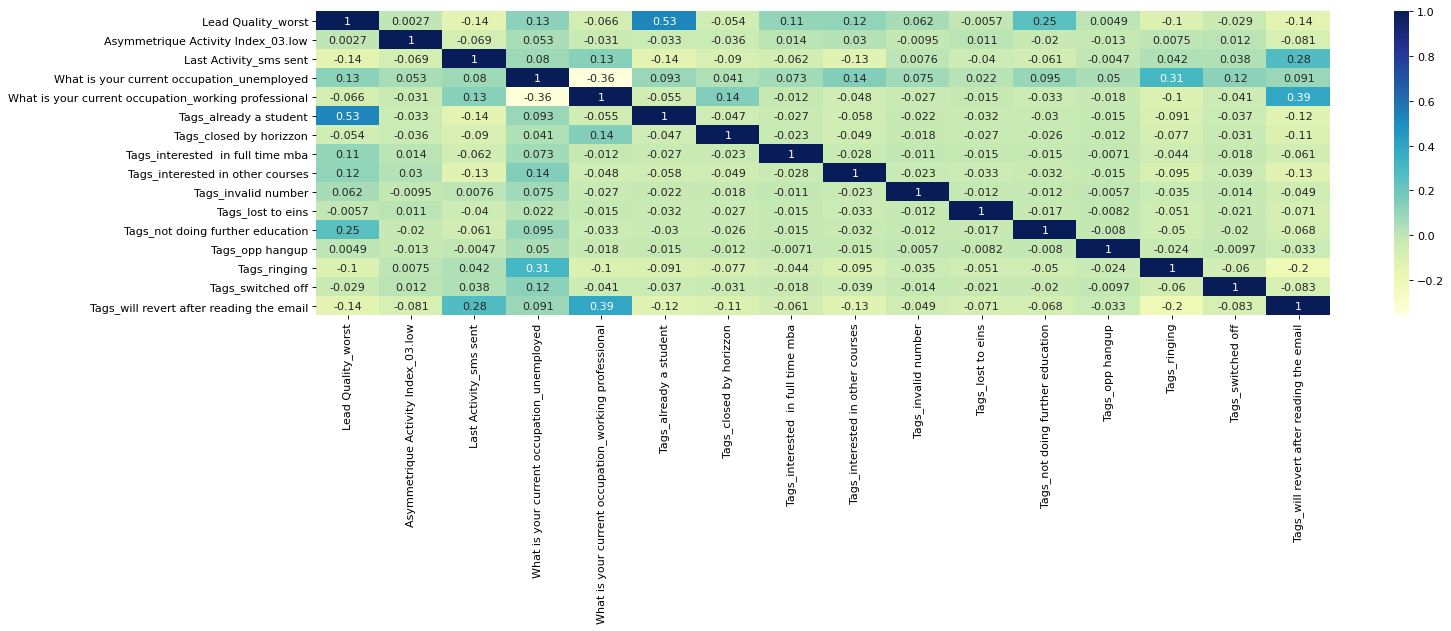

In [259]:
plt.figure(figsize=(20,8), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

**Now we need not drop any other column**

In [260]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [261]:
#sensitivity 
TP/float(TP+FN)

0.8081952920662598

In [262]:
#specificity
TN/float(TN+FP)

0.9757720979765708

In [263]:
print(FP/ float(TN+FP))

0.02422790202342918


In [264]:
# positive predictive value 
TP / float(TP+FP)

0.9532133676092545

In [265]:
# negative predictive value
TN / float(TN+ FN)

0.8928136419001218

### Lets draw ROC curve

In [266]:
def roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(10, 10))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds


In [267]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

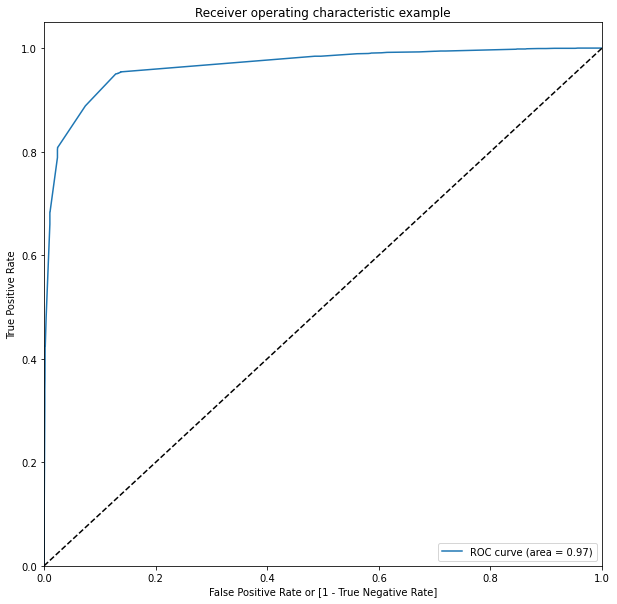

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.66240682e-04, 2.66240682e-04, 1.33120341e-03, 1.33120341e-03,
        1.33120341e-03, 1.59744409e-03, 1.86368477e-03, 1.86368477e-03,
        2.12992545e-03, 3.72736954e-03, 1.03833866e-02, 1.03833866e-02,
        1.03833866e-02, 1.03833866e-02, 1.03833866e-02, 1.03833866e-02,
        1.03833866e-02, 1.09158679e-02, 1.09158679e-02, 1.09158679e-02,
        2.39616613e-02, 2.39616613e-02, 2.39616613e-02, 2.42279020e-02,
        2.42279020e-02, 2.42279020e-02, 2.42279020e-02, 2.50266241e-02,
        7.40149095e-02, 1.28594249e-01, 1.29126731e-01, 1.29392971e-01,
        1.31522897e-01, 1.32587859e-01, 1.32587859e-01, 1.33386581e-01,
        1.37113951e-01, 1.37113951e-01, 1.38178914e-01, 1.39510117e-01,
        1.39776358e-01, 4.85356763e-01, 4.85889244e-01, 4.93077742e-01,
        4.96006390e-01, 5.61235357e-01, 5.61767838e-01, 5.80937167e-01,
        5.84930777e-01, 5.86261981e-01, 5.87326944e-01, 5.875931

In [268]:
roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [269]:
# Area under thew curve for ROC
def areaUnderCurve(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve
auc = areaUnderCurve(fpr,tpr)
auc

0.9650053085652901

## Finding cutoff

In [270]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted_churn,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.992733,5720,1,1,1,1,1,1,1,1,1,1,1
1,0,0.071233,7026,0,1,0,0,0,0,0,0,0,0,0
2,1,0.965523,6968,1,1,1,1,1,1,1,1,1,1,1
3,1,0.369635,5016,0,1,1,1,1,0,0,0,0,0,0
4,1,0.849018,6653,1,1,1,1,1,1,1,1,1,1,0


In [271]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379174  1.000000  0.000000
0.1   0.1  0.896860  0.954228  0.861821
0.2   0.2  0.899174  0.951177  0.867412
0.3   0.3  0.900826  0.950305  0.870607
0.4   0.4  0.911736  0.888405  0.925985
0.5   0.5  0.912231  0.808195  0.975772
0.6   0.6  0.911901  0.807323  0.975772
0.7   0.7  0.910579  0.803400  0.976038
0.8   0.8  0.904959  0.788579  0.976038
0.9   0.9  0.873554  0.684394  0.989084


Lets plot the sensitivity, specificity to know the optimal threshold and the meeting point will determine that.

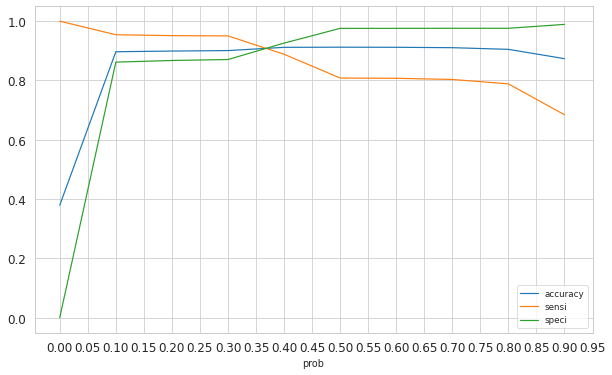

In [272]:
sns.set_style("whitegrid") # white/whitegrid/dark/ticks
sns.set_context("paper") # talk/poster
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(10,6))
# plot x axis limits
plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.yticks(size = 12)
plt.show()

From the above curve 0.35 comes out to be an optimal probability

In [273]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x >= 0.35 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted_churn,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.992733,5720,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.071233,7026,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.965523,6968,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.369635,5016,0,1,1,1,1,0,0,0,0,0,0,1
4,1,0.849018,6653,1,1,1,1,1,1,1,1,1,1,0,1


In [274]:
#accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.90099173553719

In [275]:
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion1

array([[3271,  485],
       [ 114, 2180]])

In [276]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [277]:
# sensitivity 
TP / float(TP+FN)

0.9503051438535309

In [278]:
# specificity
TN / float(TN+FP)


0.8708732694355698

In [279]:
print(FP/ float(TN+FP))

0.12912673056443025


In [280]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8180112570356473


In [281]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9663220088626292


**Precision and recall**

In [282]:
precision = confusion1[1,1]/(confusion1[0,1]+confusion1[1,1])
precision

0.8180112570356473

In [283]:
#Recall
recall = confusion1[1,1]/(confusion1[1,0]+confusion1[1,1])
recall

0.9503051438535309

In [284]:

from sklearn.metrics import precision_score, recall_score

In [285]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8180112570356473

In [286]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)


0.9503051438535309

Precision and recall tradeoff

In [287]:
from sklearn.metrics import precision_recall_curve

In [288]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       1
 1       0
 2       1
 3       1
 4       1
        ..
 6045    1
 6046    0
 6047    0
 6048    0
 6049    0
 Name: Converted, Length: 6050, dtype: int64, 0       1
 1       0
 2       1
 3       1
 4       1
        ..
 6045    1
 6046    0
 6047    0
 6048    0
 6049    0
 Name: final_predicted, Length: 6050, dtype: int64)

In [289]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

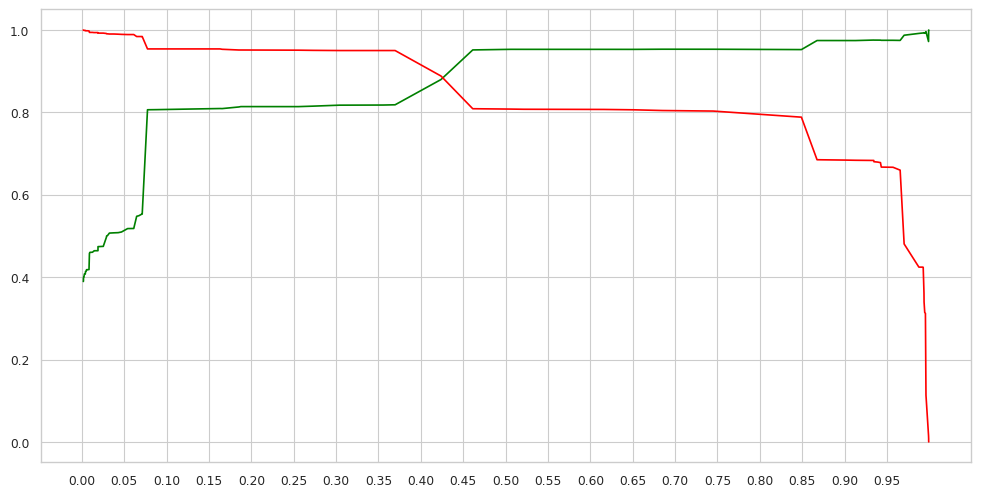

In [290]:
plt.figure(figsize=(12, 6), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

Graph above shows that, we get the optical threshold value as close to .42. However our target is to have Lead Conversion Rate around 80%

Calculating the F1 score

In [291]:
F1 = 2*(precision*recall)/(precision+recall)
F1

0.8792095180479935

# Making Predictions on the test set

In [292]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Quality_high in relevance,Lead Quality_low in relevance,Lead Quality_might be,Lead Quality_not sure,Lead Quality_worst,Asymmetrique Activity Index_01.high,Asymmetrique Activity Index_02.medium,Asymmetrique Activity Index_03.low,How did you hear about X Education_advertisements,How did you hear about X Education_email,How did you hear about X Education_multiple sources,How did you hear about X Education_online search,How did you hear about X Education_other,How did you hear about X Education_sms,How did you hear about X Education_social media,How did you hear about X Education_student of someschool,How did you hear about X Education_word of mouth,Last Activity_approached upfront,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email marked spam,Last Activity_email opened,Last Activity_email received,Last Activity_form submitted on website,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_resubscribed to emails,Last Activity_sms sent,Last Activity_unreachable,Last Activity_unsubscribed,Last Activity_view in browser link clicked,Last Activity_visited booth in tradeshow,What is your current occupation_businessman,What is your current occupation_housewife,What is your current occupation_other,...,Lead Source_facebook,Lead Source_google,Lead Source_live chat,Lead Source_nc_edm,Lead Source_olark chat,Lead Source_organic search,Lead Source_pay per click ads,Lead Source_press_release,Lead Source_reference,Lead Source_referral sites,Lead Source_social media,Lead Source_testone,Lead Source_welearn,Lead Source_welearnblog_home,Lead Source_welingak website,Lead Source_youtubechannel,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Last Notable Activity_email bounced,Last Notable Activity_email link clicked,Last Notable Activity_email marked spam,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked,Do Not Email_yes,Do Not Call_yes,Search_yes,Digital Advertisement_yes,Through Recommendations_yes,A free copy of Mastering The Interview_yes
378,-0.336465,-0.188969,-0.052301,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
321,0.497461,1.702311,1.161899,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
7646,0.497461,-0.220063,-0.459058,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
6317,-1.170391,-0.876707,-1.266501,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1241,-1.170391,-0.876707,-1.266501,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [293]:
X_test = X_test[col]
X_test.head()

,Lead Quality_worst,Asymmetrique Activity Index_03.low,Last Activity_sms sent,What is your current occupation_unemployed,What is your current occupation_working professional,Tags_already a student,Tags_closed by horizzon,Tags_interested in full time mba,Tags_interested in other courses,Tags_invalid number,Tags_lost to eins,Tags_not doing further education,Tags_opp hangup,Tags_ringing,Tags_switched off,Tags_will revert after reading the email
378,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
321,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
7646,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
6317,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [294]:
#Add constant
X_test_sm = sm.add_constant(X_test)

In [295]:
y_test_pred = res.predict(X_test_sm)

In [296]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [297]:

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [298]:
y_test_df['LeadID'] = y_test_df.index

In [299]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [300]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [301]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [302]:
y_pred_final = y_pred_final.reindex(['LeadID','Converted','Conversion_Prob'], axis=1)

In [303]:
y_pred_final.shape

(2593, 3)

Using the probability threshold value 0f 0.35 on the test dataset to predict if a lead will convert

In [304]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x >= 0.35 else 0)

In [305]:
# Let's check the overall accuracy.
acc_score=metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
acc_score

0.8908600077130736

In [306]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
print(confusion_test)

[[1350  234]
 [  49  960]]


**Lets visualise confusion metrics**

In [307]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

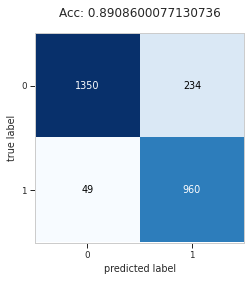

In [308]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=confusion_test)
title = 'Acc: {}'.format(acc_score)
plt.title(title, size = 12);
plt.tight_layout()
plt.show()

In [309]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

Sensitivity

In [310]:
TP / float(TP+FN)

0.9514370664023786

Specificity

In [311]:
TN / float(TN+FP)

0.8522727272727273

False positive rate

In [312]:
print(FP/ float(TN+FP))

0.14772727272727273


In [313]:
# Positive Predictive Value
TP / float(TP+FP)

0.8040201005025126

In [314]:
# Negative Predictive Value
TN / float(TN+ FN)

0.9649749821300929

In [315]:
# Precision
Precision = confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1])
Precision

0.8040201005025126

In [316]:
#Recall
Recall = confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])
Recall

0.9514370664023786

In [317]:
#F1 Score
F1 = 2*(Precision*Recall)/(Precision+Recall)
F1

0.8715388107126646

In [318]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.96      0.85      0.91      1584
           1       0.80      0.95      0.87      1009

    accuracy                           0.89      2593
   macro avg       0.88      0.90      0.89      2593
weighted avg       0.90      0.89      0.89      2593



Plot ROC for test set

In [319]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.Conversion_Prob, drop_intermediate = False )

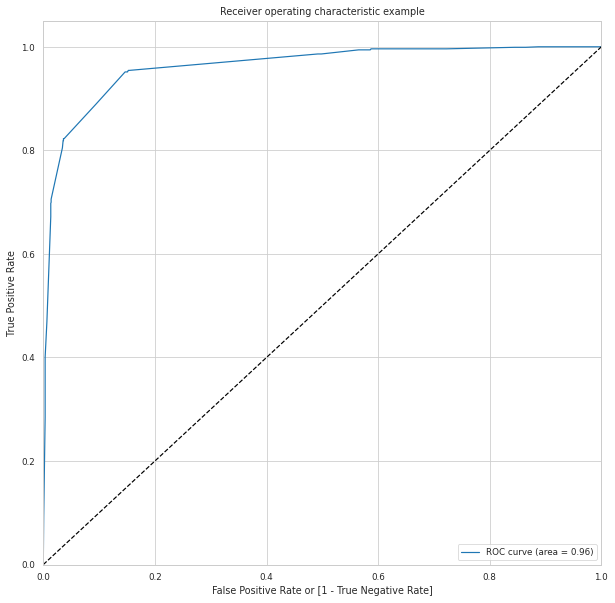

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 6.31313131e-04, 3.15656566e-03, 3.15656566e-03,
        3.15656566e-03, 3.15656566e-03, 3.15656566e-03, 3.15656566e-03,
        3.15656566e-03, 3.15656566e-03, 6.31313131e-03, 1.32575758e-02,
        1.32575758e-02, 1.32575758e-02, 1.32575758e-02, 1.38888889e-02,
        1.38888889e-02, 1.38888889e-02, 1.38888889e-02, 3.40909091e-02,
        3.53535354e-02, 3.59848485e-02, 3.59848485e-02, 3.59848485e-02,
        3.72474747e-02, 9.40656566e-02, 1.46464646e-01, 1.47727273e-01,
        1.48989899e-01, 1.50252525e-01, 1.50883838e-01, 1.52146465e-01,
        1.53409091e-01, 1.54040404e-01, 4.91792929e-01, 4.95580808e-01,
        4.98106061e-01, 5.65025253e-01, 5.82702020e-01, 5.85227273e-01,
        5.85858586e-01, 5.87121212e-01, 5.87752525e-01, 5.88383838e-01,
        6.10479798e-01, 6.14898990e-01, 6.25000000e-01, 6.78030303e-01,
        6.78661616e-01, 6.79292929e-01, 7.05176768e-01, 7.070707

In [320]:
roc(y_pred_final.Converted, y_pred_final.Conversion_Prob)

Lets calculate Area under the curve to know how good is our model

In [321]:
auc = areaUnderCurve(fpr,tpr)
auc

0.962345831956833

Our model seems to be doing well , seems the area under the curve is 0.9623

# Calculate lead score

In [322]:
leads_test_pred = y_pred_final.copy()
leads_test_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,378,0,0.005091,0
1,321,0,0.025293,0
2,7646,0,0.061256,0
3,6317,0,0.071233,0
4,1241,0,0.071233,0


In [323]:
# Selecting the train dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

,Converted,Conversion_Prob,LeadID,predicted_churn,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.992733,5720,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.071233,7026,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.965523,6968,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.369635,5016,0,1,1,1,1,0,0,0,0,0,0,1
4,1,0.849018,6653,1,1,1,1,1,1,1,1,1,1,0,1


In [324]:
leads_train_pred = leads_train_pred[['LeadID','Converted','Conversion_Prob','final_predicted']]
leads_train_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,5720,1,0.992733,1
1,7026,0,0.071233,0
2,6968,1,0.965523,1
3,5016,1,0.369635,1
4,6653,1,0.849018,1


In [325]:
# Concatenating the train and the test dataset
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,5720,1,0.992733,1
1,7026,0,0.071233,0
2,6968,1,0.965523,1
3,5016,1,0.369635,1
4,6653,1,0.849018,1


In [326]:
print(leads_train_pred.shape)
print(leads_test_pred.shape)
print(lead_full_pred.shape)

(6050, 4)
(2593, 4)
(8643, 4)


In [327]:
# Calculate lead score now
lead_full_pred['Lead_Score'] = lead_full_pred['Conversion_Prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted,Lead_Score
0,5720,1,0.992733,1,99
1,7026,0,0.071233,0,7
2,6968,1,0.965523,1,97
3,5016,1,0.369635,1,37
4,6653,1,0.849018,1,85


In [328]:
# set the index as lead id and sort in ascending to view the results
lead_full_pred = lead_full_pred.set_index('LeadID').sort_index(axis = 0, ascending = True)
lead_full_pred.head()

,Converted,Conversion_Prob,final_predicted,Lead_Score
LeadID,,,,
0,0,0.025293,0,3
1,0,0.008463,0,1
2,1,0.744915,1,74
3,0,0.008463,0,1
4,1,0.965523,1,97


In [329]:
original_leads = original_leads[['Lead Number']]
original_leads.head()

,Lead Number
0,660737
1,660728
2,660727
3,660719
4,660681


In [330]:
# Now we need to merge with lead ids to determine the lead.
leads_with_score = pd.concat([original_leads, lead_full_pred], axis=1)
leads_with_score.head(10)

,Lead Number,Converted,Conversion_Prob,final_predicted,Lead_Score
0,660737,0,0.025293,0,3
1,660728,0,0.008463,0,1
2,660727,1,0.744915,1,74
3,660719,0,0.008463,0,1
4,660681,1,0.965523,1,97
5,660680,0,0.071233,0,7
6,660673,1,0.965523,1,97
7,660664,0,0.071233,0,7
8,660624,0,0.071233,0,7
9,660616,0,0.071233,0,7


In [331]:
leads_with_score.shape

(8643, 5)

In [332]:
total = pd.DataFrame(leads_with_score.isnull().sum().sort_values(ascending=False), columns=['Total'])
total

,Total
Lead_Score,0
final_predicted,0
Conversion_Prob,0
Converted,0
Lead Number,0


***Determining Feature Importance***

We need to determine which factors lead to Lead conversion the most.

In [333]:
# get the coefficient values for the features selected
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Lead Quality_worst                                     -2.32
Asymmetrique Activity Index_03.low                     -2.71
Last Activity_sms sent                                  2.03
What is your current occupation_unemployed              2.26
What is your current occupation_working professional    2.41
Tags_already a student                                 -3.64
Tags_closed by horizzon                                 5.22
Tags_interested  in full time mba                      -3.21
Tags_interested in other courses                       -3.34
Tags_invalid number                                    -4.40
Tags_lost to eins                                       5.36
Tags_not doing further education                       -4.06
Tags_opp hangup                                        -2.80
Tags_ringing                                           -4.46
Tags_switched off                                      -5.19
Tags_will revert after reading the email                3.64
dtype: float64

In [334]:
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Lead Quality_worst                                     -43.31
Asymmetrique Activity Index_03.low                     -50.50
Last Activity_sms sent                                  37.94
What is your current occupation_unemployed              42.17
What is your current occupation_working professional    45.00
Tags_already a student                                 -67.81
Tags_closed by horizzon                                 97.45
Tags_interested  in full time mba                      -59.84
Tags_interested in other courses                       -62.38
Tags_invalid number                                    -82.04
Tags_lost to eins                                      100.00
Tags_not doing further education                       -75.74
Tags_opp hangup                                        -52.18
Tags_ringing                                           -83.12
Tags_switched off                                      -96.83
Tags_will revert after reading the email                67.89
dtype: f

In [335]:
# sort features on coefficients
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx
##

Lead Quality_worst                                      14
Asymmetrique Activity Index_03.low                      13
Last Activity_sms sent                                   9
What is your current occupation_unemployed              11
What is your current occupation_working professional     5
Tags_already a student                                   8
Tags_closed by horizzon                                  7
Tags_interested  in full time mba                       12
Tags_interested in other courses                         1
Tags_invalid number                                      0
Tags_lost to eins                                        2
Tags_not doing further education                         3
Tags_opp hangup                                          4
Tags_ringing                                            15
Tags_switched off                                        6
Tags_will revert after reading the email                10
dtype: int64

**Get top 3 features**

In [336]:
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(10)

,index,0
10,Tags_lost to eins,100.00
6,Tags_closed by horizzon,97.45
15,Tags_will revert after reading the email,67.89
4,What is your current occupation_working profes...,45.00
3,What is your current occupation_unemployed,42.17
2,Last Activity_sms sent,37.94
0,Lead Quality_worst,-43.31
1,Asymmetrique Activity Index_03.low,-50.50
12,Tags_opp hangup,-52.18
7,Tags_interested in full time mba,-59.84


Based on the model, we can see the following few features that effect the lead conversion most are - 
1. Tags_lost to eins
2. Tags_closed by horizzon
3. Tags_will revert after reading the email
4. What is your current occupation_working professional
5. What is your current occupation_unemployed	
6. Last Activity_sms sent	
7. Lead Quality_worst	
8. Asymmetrique Activity Index_03.low	
9. Tags_opp hangup	
10. Tags_interested in full time mba